# Imports

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans , DBSCAN
from sklearn.metrics import silhouette_score ,silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import GridSearchCV

# Explore Data

In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.drop('CustomerID',axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
infos=pd.DataFrame(index=df.columns)
infos['Dtype']=df.dtypes
infos['N_Unique']=df.nunique()
infos['Null']=df.isna().sum()
infos['Unique']=[''] * len(df.columns)
def column_info(data):
  for i in data.columns:
    infos.loc[i,'Unique']=str(data[i].unique())
column_info(df)
infos

,Dtype,N_Unique,Null,Unique
Gender,object,2,0,['Male' 'Female']
Age,int64,51,0,[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 ...
Annual Income (k$),int64,64,0,[ 15 16 17 18 19 20 21 23 24 25 28 ...
Spending Score (1-100),int64,84,0,[39 81 6 77 40 76 94 3 72 14 99 15 13 79 35 ...


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


# **EDA**

## Basic chart for each column

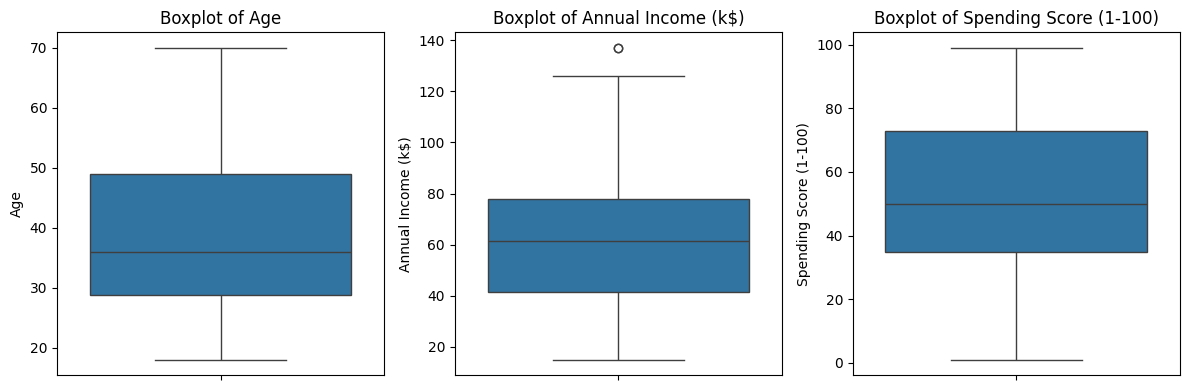

In [ ]:
# Visualize outliers using boxplots
plt.figure(figsize=(12, 4))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

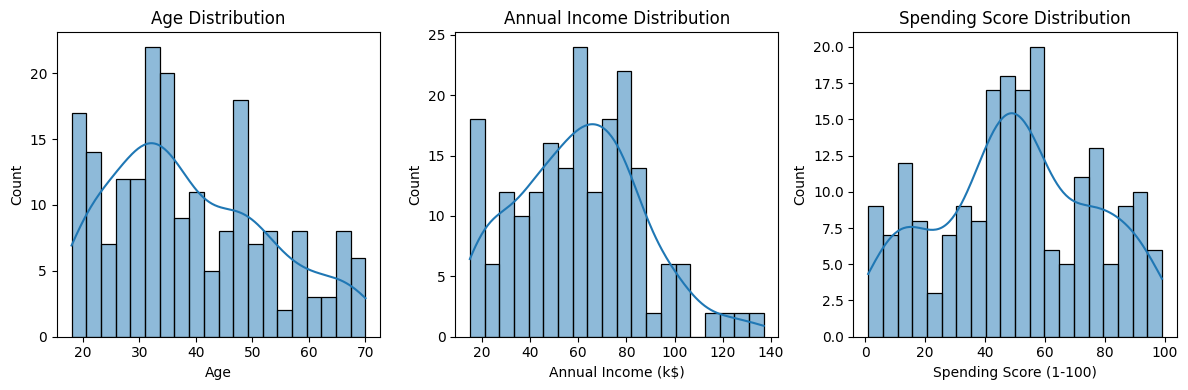

In [ ]:
# Visualize distributions of numerical features
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.tight_layout()
plt.show()

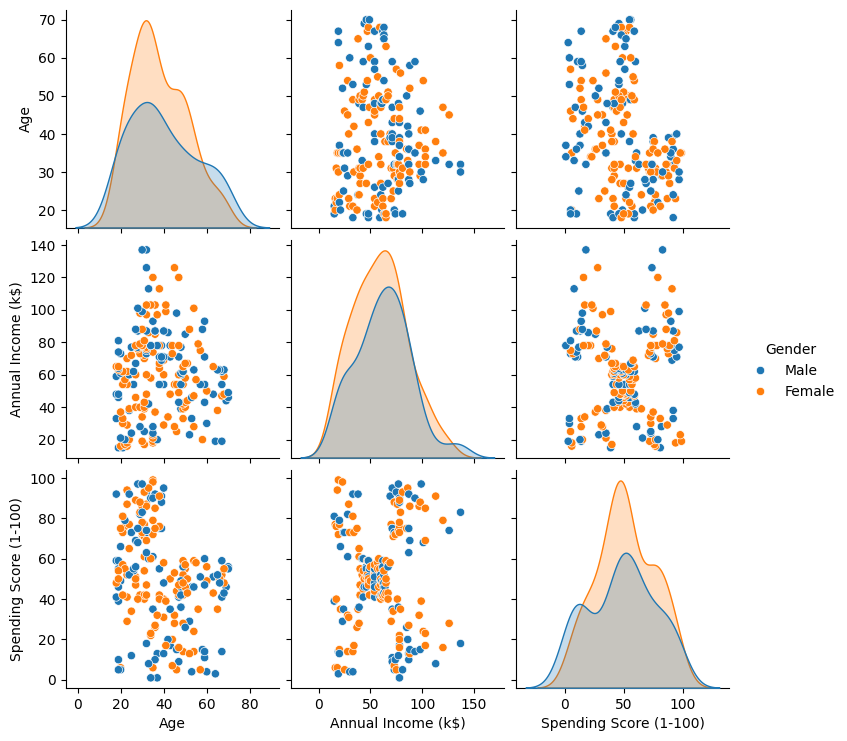

In [ ]:
#Creating visual methods to analyze the data.
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender')
plt.show()


In [ ]:
# Gender distribution
px.pie(df,names='Gender')

## Complex chart between columns

### Age & Gender

<Axes: xlabel='Age', ylabel='Count'>

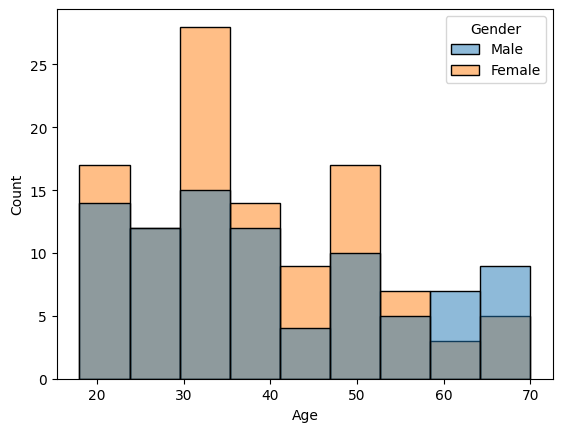

In [ ]:
sns.histplot(data=df, x='Age', hue='Gender')

### Annual Income (k$) & Gender

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

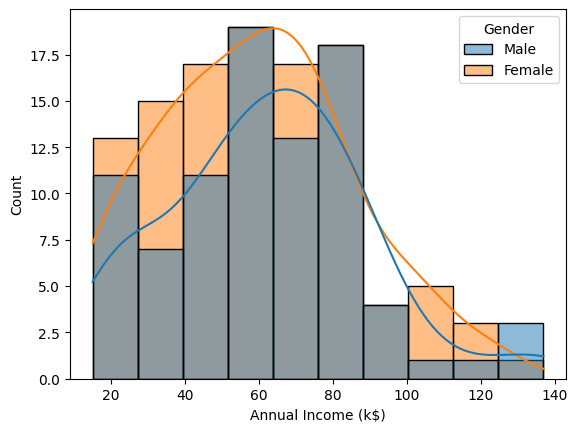

In [ ]:
sns.histplot(data=df, x='Annual Income (k$)', hue='Gender',kde=True)

In [ ]:
fig = px.box(
    df,
    x="Gender",
    y="Annual Income (k$)",
    color="Gender",
    title="Annual Income by Gender"
)
fig.show()

### Spending Score (1-100) & Gender

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

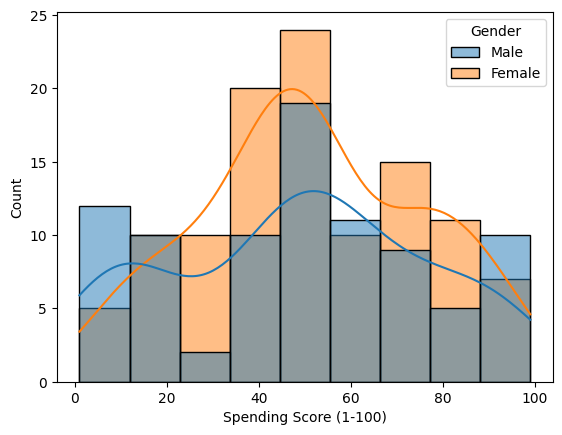

In [ ]:
sns.histplot(data=df, x='Spending Score (1-100)', hue='Gender',kde=True)

In [ ]:
fig = px.box(
    df,
    x="Gender",
    y="Spending Score (1-100)",
    color="Gender",
    title="Annual Income by Gender"
)
fig.show()

## Age groups


In [ ]:
bins = [18,23,28,33,38,43,48,53,58,63,70]
labels = ['18-23', '23-28', '28-33', '33-38', '38-43',
 '43-48', '48-53', '53-58', '58-63', '63-70']

df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),age_group
0,Male,19,15,39,18-23
1,Male,21,15,81,18-23
2,Female,20,16,6,18-23
3,Female,23,16,77,23-28
4,Female,31,17,40,28-33


In [ ]:
age_annual=df.groupby('age_group')['Annual Income (k$)'].mean()
age_annual=pd.DataFrame(age_annual)
age_annual['Spending Score (1-100)']=df.groupby('age_group')['Spending Score (1-100)'].mean()
genders_df = pd.crosstab(df['age_group'], df['Gender'])
age_annual = age_annual.join(genders_df)
age_annual

/tmp/ipython-input-2860977894.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-2860977894.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Annual Income (k$),Spending Score (1-100),Female,Male
age_group,,,,
18-23,46.280000,52.120000,11,14
23-28,51.142857,59.809524,13,8
28-33,72.514286,70.342857,23,12
33-38,66.807692,49.807692,15,11
38-43,71.421053,53.210526,10,9
43-48,67.882353,28.058824,12,5
48-53,55.380952,41.523810,13,8
53-58,58.300000,34.200000,6,4
58-63,55.444444,30.111111,3,6


groupby with Annual Income (k$) and Spending Score (1-100)

In [ ]:
px.bar(age_annual,x=age_annual.index,y='Annual Income (k$)')

In [ ]:
px.bar(age_annual,x=age_annual.index,y='Spending Score (1-100)')

In [ ]:
px.bar(age_annual,x=age_annual.index,y=['Female','Male'], barmode = 'group')

### Annual Income and Spending Score by Age Group

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Annual Income by Age Group', 'Spending Score by Age Group'))

fig.add_trace(go.Bar(x=age_annual.index, y=age_annual['Annual Income (k$)'], name='Annual Income'),
              row=1, col=1)

fig.add_trace(go.Bar(x=age_annual.index, y=age_annual['Spending Score (1-100)'], name='Spending Score'),
              row=1, col=2)

fig.update_layout(height=600, width=1400,
                          title={
        'text': "Mean Annual Income and Spending Score by Age Group",
        'x': 0.5,
        'xanchor': 'center'
    }
                  )
fig.show()



The most frequent age group is 28-33 with mean income : 72K , and the least frequent is 18-23 with mean income : 46K

---

The most frequent age group is 28-33 with mean spending score : 70 , and the least frequent is 18-23 with mean spending score : 28

### Marged Annual Income and Spending Score by Age Group

In [ ]:
fig = px.bar(age_annual,x=age_annual.index,y=['Annual Income (k$)','Spending Score (1-100)'],title="Marged Mean Annual Income and Spending Score by Age Group")
fig.update_layout(
    title={
        'x': 0.5,
        'xanchor': 'center'
    }
)
fig.show()

### Annual Income and Spending Score

In [ ]:
%pip install statsmodels

fig = px.scatter(
    df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    trendline="ols",
    title="Relationship between Annual Income and Spending Score"
)
fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
fig = px.scatter(
    df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    size="Age",
    trendline="ols",
    color="Gender",
    hover_data=["Age"],
    title="Annual Income vs Spending Score (Bubble size = Age)"
)
fig.show()

### pre-for-vis-2

In [ ]:
age_labels=pd.DataFrame(columns=['age_group','Annual Income (k$)','Spending Score (1-100)','gender','count_gender'])


In [ ]:
age_labels['age_group']=df.groupby('age_group')['Gender'].value_counts().index.get_level_values(0)
age_labels['gender']=df.groupby('age_group')['Gender'].value_counts().index.get_level_values(1)
age_labels['count_gender']=df.groupby('age_group')['Gender'].value_counts().values
for i in age_labels['age_group'].unique():
  age_labels.loc[age_labels['age_group']==i,'Annual Income (k$)']=df.groupby('age_group')['Annual Income (k$)'].mean()[i]
  age_labels.loc[age_labels['age_group']==i,'Spending Score (1-100)']=df.groupby('age_group')['Spending Score (1-100)'].mean()[i]
age_labels

/tmp/ipython-input-2670665555.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-2670665555.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-2670665555.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-2670665555.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to 

,age_group,Annual Income (k$),Spending Score (1-100),gender,count_gender
0,18-23,46.28,52.12,Male,14
1,18-23,46.28,52.12,Female,11
2,23-28,51.142857,59.809524,Female,13
3,23-28,51.142857,59.809524,Male,8
4,28-33,72.514286,70.342857,Female,23
5,28-33,72.514286,70.342857,Male,12
6,33-38,66.807692,49.807692,Female,15
7,33-38,66.807692,49.807692,Male,11
8,38-43,71.421053,53.210526,Female,10
9,38-43,71.421053,53.210526,Male,9


### Annual Income & Spending Score by Age Group with Gender

In [ ]:
fig_income = px.bar(
    age_labels,
    x="age_group",
    y="Annual Income (k$)",
    color="gender",
    text="count_gender",
    barmode="stack",
    title="Annual Income by Age Group (Stacked by Gender Count)",
    labels={
        "age_group": "Age Group",
        "Annual Income (k$)": "Annual Income",
        "gender": "Gender"
    }
)
fig_income.update_traces(textposition="inside")
fig_income.update_layout(title_x=0.5)
fig_income.show()

fig_spend = px.bar(
    age_labels,
    x="age_group",
    y="Spending Score (1-100)",
    color="gender",
    text="count_gender",
    barmode="stack",
    title="Spending Score by Age Group (Stacked by Gender Count)",
    labels={
        "age_group": "Age Group",
        "Spending Score (1-100)": "Spending Score",
        "gender": "Gender"
    }
)
fig_spend.update_traces(textposition="inside")
fig_spend.update_layout(title_x=0.5)
fig_spend.show()

In [ ]:
df.drop('age_group',axis=1,inplace=True)

## Heatmap

In [ ]:
 #sns.heatmap(df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']].corr(),annot=True)

# Encoding

In [ ]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# modeling using Annual Income & Spending Score only

## Case1:scaling

In [ ]:
scaler1 = StandardScaler()
df_scaled = scaler1.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

### Kmeans

In [ ]:
interia=[]
k=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_scaled)
  interia.append(kmeans.inertia_)
  k.append(i)

Text(0.5, 1.0, 'The Elbow Method')

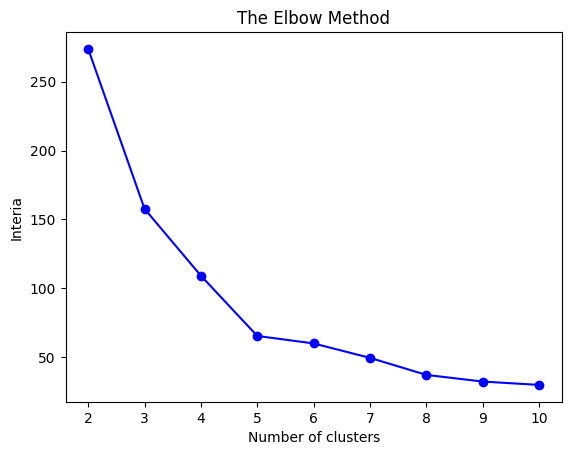

In [ ]:
plt.plot(k,interia,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Interia')
plt.title('The Elbow Method')

In [ ]:
scores=[]
k=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_scaled)
  scores.append(silhouette_score(df_scaled,kmeans.labels_))
  print(i,scores[-1])
  k.append(i)


labled_df = pd.DataFrame(df_scaled, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
labled_df['Cluster'] = kmeans.labels_

2 0.3973270007887498
3 0.46658474419000145
4 0.49434988482196784
5 0.5546571631111091
6 0.5138257534676561
7 0.50200146805547
8 0.4550112502601921
9 0.4566624374485964
10 0.44475993501732874


Text(0.5, 1.0, 'The Elbow Method')

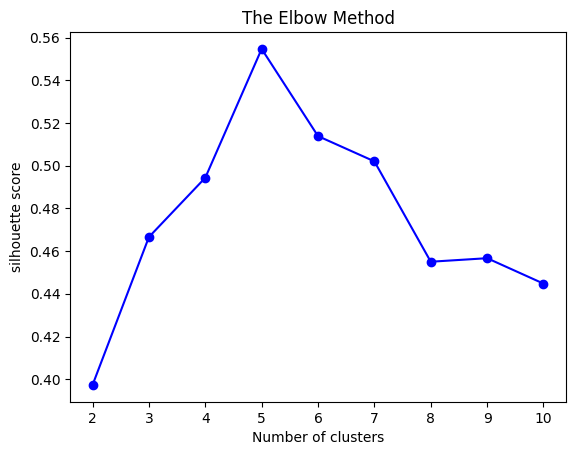

In [ ]:
plt.plot(k,scores,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.title('The Elbow Method')

In [ ]:
def plot_best4_kmeans_silhouette(X, cluster_range):
    results = []


    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters,init='k-means++', random_state=42)
        labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        sample_silhouette_values = silhouette_samples(X, labels)
        results.append((n_clusters, silhouette_avg, labels, sample_silhouette_values))


    results.sort(key=lambda x: x[1], reverse=True)
    best4 = results[:4]


    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for ax, (n_clusters, silhouette_avg, labels, sample_silhouette_values) in zip(axes, best4):
        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(i) / n_clusters)
            ax.fill_betweenx(np.arange(y_lower, y_upper),
                             0, ith_cluster_silhouette_values,
                             facecolor=color, edgecolor=color, alpha=0.7)

            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        ax.set_title(f"k={n_clusters} (avg={silhouette_avg:.2f})")
        ax.set_xlabel("Silhouette Coefficient")
        ax.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax.set_yticks([])

    plt.tight_layout()
    plt.show()

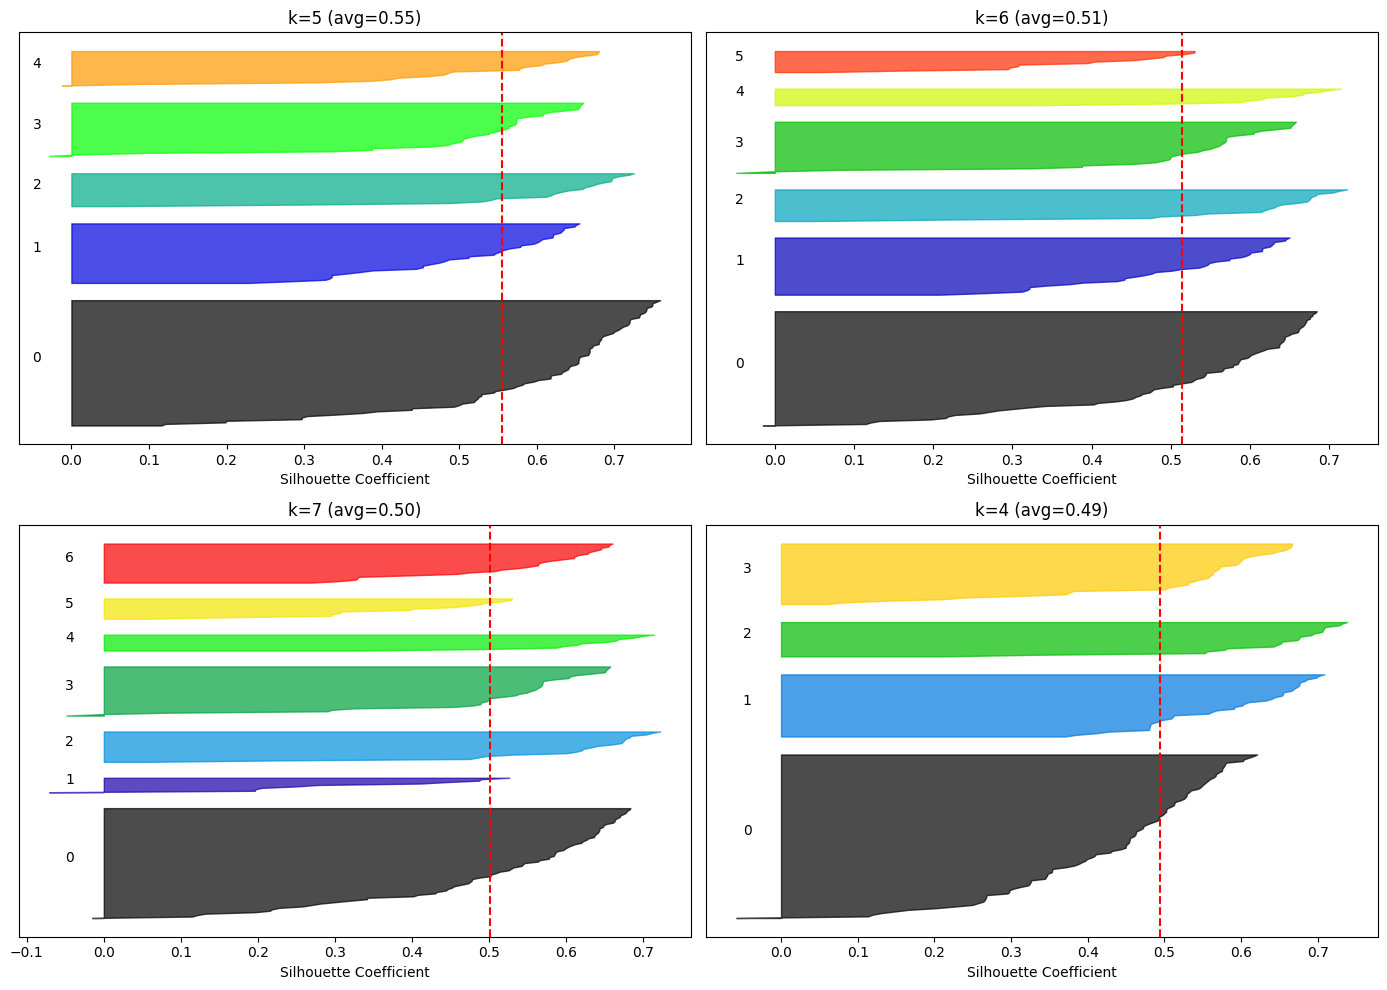

In [ ]:
plot_best4_kmeans_silhouette(df_scaled,range(2,11))

In [ ]:
model_kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
model_kmeans.fit(df_scaled)

KMeans(n_clusters=5, random_state=42)

In [ ]:
centroids=model_kmeans.cluster_centers_

<Axes: >

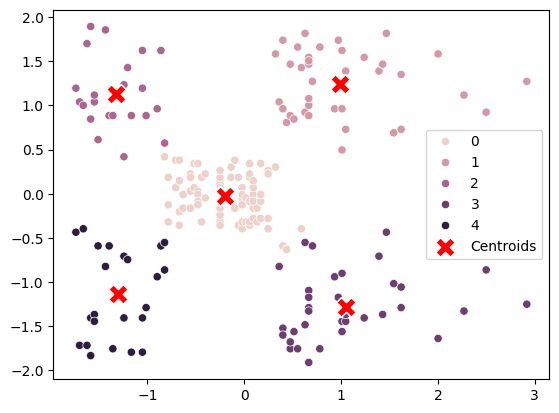

In [ ]:
sns.scatterplot(x=df_scaled[:,0],y=df_scaled[:,1],hue=model_kmeans.labels_)
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

### DBSCAN

In [ ]:
eps_values = [0.01,0.001,0.1,1,1.5,2,2.5,3,3.5,4.5,5,10,11.5,12,12.5,13]
min_samples_values = range(3, 10)
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(df_scaled)


        if len(set(labels)) > 1 and len(set(labels)) != 1:
            score = silhouette_score(df_scaled, labels)
            results.append({
                "eps": eps,
                "min_samples": min_samples,
                "silhouette_score": score
            })


results_df = pd.DataFrame(results)

best_results = results_df.sort_values(by="silhouette_score", ascending=False).head(5)
print(best_results)

   eps  min_samples  silhouette_score
0  0.1            3         -0.203084
2  0.1            5         -0.270093
1  0.1            4         -0.275655
4  0.1            7         -0.284317
3  0.1            6         -0.301444


In [ ]:
model_DBSCAN=DBSCAN(eps=0.1, min_samples=3)
labels=model_DBSCAN.fit_predict(df_scaled)

<Axes: >

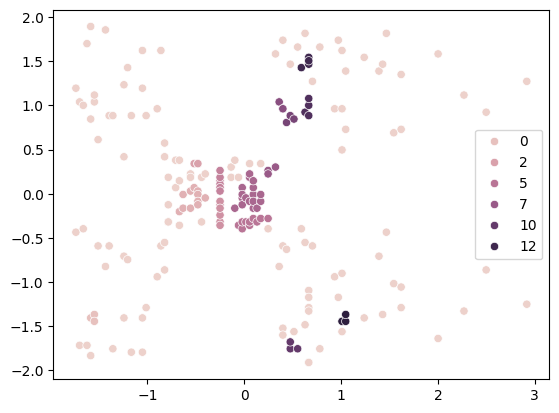

In [ ]:
sns.scatterplot(x=df_scaled[:,0],y=df_scaled[:,1],hue=labels)

## Case 2 :without scaling

In [ ]:
df_subset = df[[ 'Annual Income (k$)', 'Spending Score (1-100)']]
df_subset

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Kmeans

In [ ]:
interia=[]
k=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_subset)
  interia.append(kmeans.inertia_)
  k.append(i)

Text(0.5, 1.0, 'The Elbow Method')

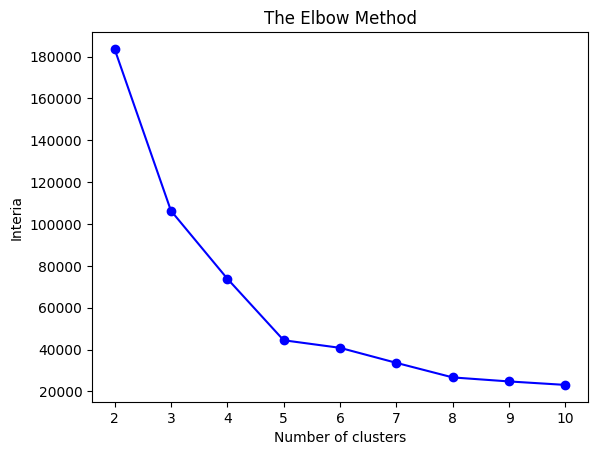

In [ ]:
plt.plot(k,interia,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Interia')
plt.title('The Elbow Method')

In [ ]:
scores=[]
k=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_subset)
  scores.append(silhouette_score(df_subset,kmeans.labels_))
  print(i,scores[-1])
  k.append(i)

2 0.39564531743995546
3 0.46761358158775435
4 0.4937945814354117
5 0.553931997444648
6 0.5128405328004378
7 0.5017174409749505
8 0.4962769338093321
9 0.45587414130065596
10 0.4426214845978157


Text(0.5, 1.0, 'The Elbow Method')

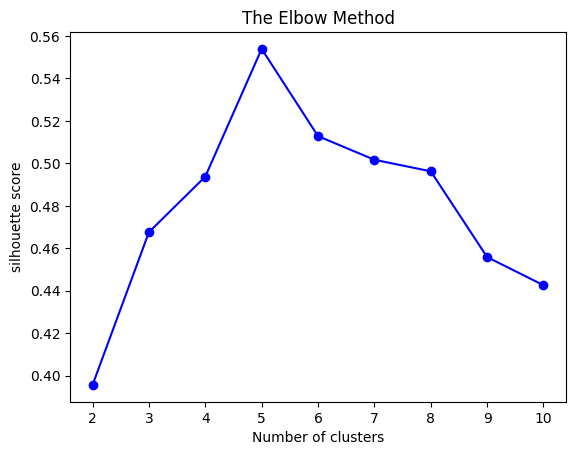

In [ ]:
plt.plot(k,scores,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.title('The Elbow Method')

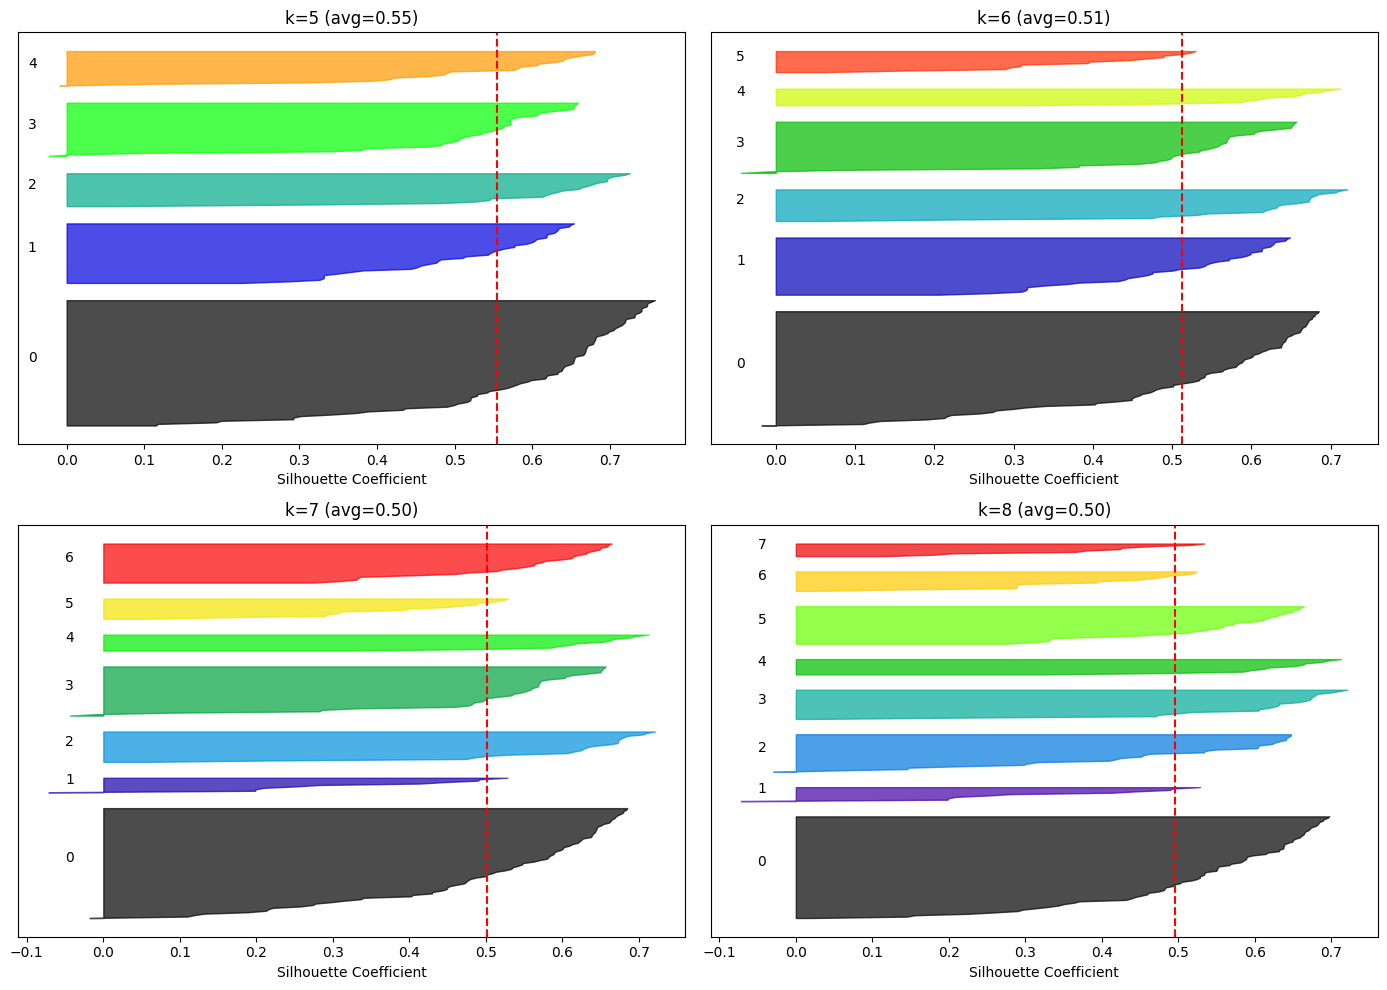

In [ ]:
plot_best4_kmeans_silhouette(df_subset,range(2,11))

In [ ]:
model_kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
model_kmeans.fit(df_subset)

Y2 = model_kmeans.predict(df_subset)
print(silhouette_score(df_subset, Y2))
print(Y2)

0.553931997444648
[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [ ]:
centroids=model_kmeans.cluster_centers_
centroids

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

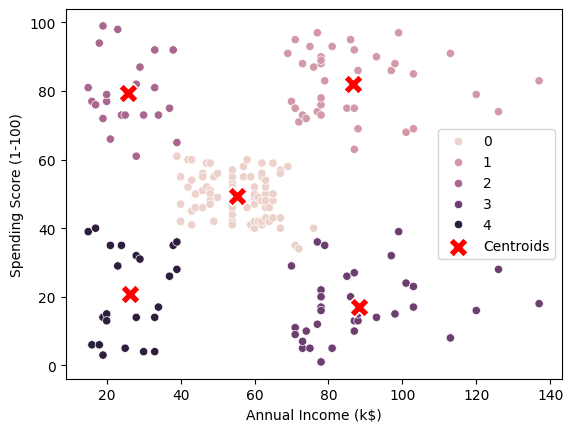

In [ ]:
sns.scatterplot(x=df_subset.iloc[:,0],y=df_subset.iloc[:,1],hue=model_kmeans.labels_)
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

### DBSCAN

In [ ]:
eps_values = [0.01,0.001,0.1,1,1.5,2,2.5,3,3.5,4.5,5,10,11.5,12,12.5,13]
min_samples_values = range(3, 10)
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(df_subset)


        if len(set(labels)) > 1 and len(set(labels)) != 1:
            score = silhouette_score(df_subset, labels)
            results.append({
                "eps": eps,
                "min_samples": min_samples,
                "silhouette_score": score
            })


results_df = pd.DataFrame(results)

best_results = results_df.sort_values(by="silhouette_score", ascending=False).head(5)
print(best_results)

     eps  min_samples  silhouette_score
60  12.0            9          0.426024
53  11.5            9          0.423352
44  10.0            7          0.420840
67  12.5            9          0.414334
42  10.0            5          0.412492


In [ ]:
model_DBSCAN=DBSCAN(eps=12, min_samples=9)
labels=model_DBSCAN.fit_predict(df_subset)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

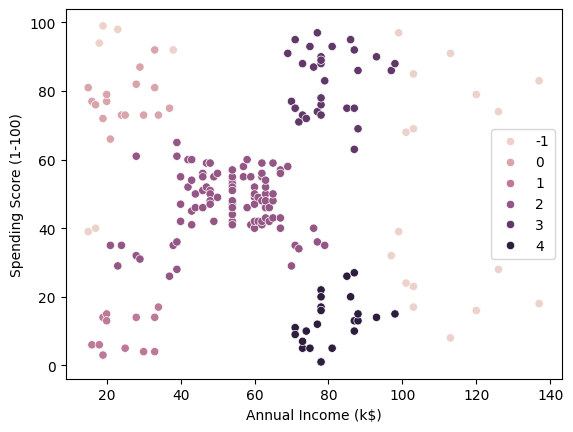

In [ ]:
sns.scatterplot(x=df_subset.iloc[:,0],y=df_subset.iloc[:,1],hue=labels)

# modeling using all four featurs

##Case 3: with scaling

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Gender',axis=1))

df_scaled = pd.DataFrame(df_scaled, columns=df.columns[1:])
df_scaled['Gender'] = df['Gender']
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


### Kmeans

In [ ]:
interia=[]
k=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_scaled)
  interia.append(kmeans.inertia_)
  k.append(i)

Text(0.5, 1.0, 'The Elbow Method')

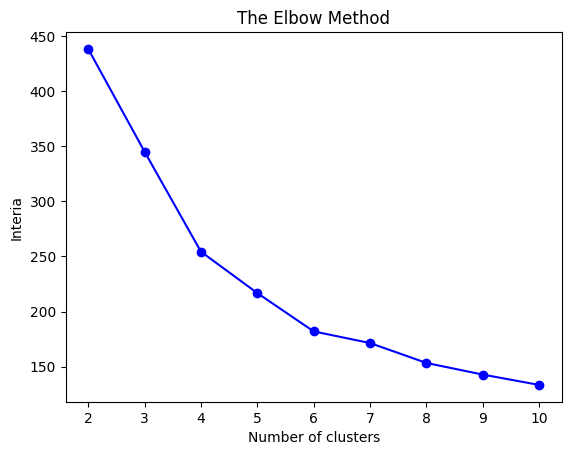

In [ ]:
plt.plot(k,interia,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Interia')
plt.title('The Elbow Method')

In [ ]:
scores=[]
k=[]
for i in range(2,13):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_scaled)
  scores.append(silhouette_score(df_scaled,kmeans.labels_))
  print(i,scores[-1])
  k.append(i)

2 0.3031976564160757
3 0.31200836318195724
4 0.35044061449694197
5 0.34977050035201074
6 0.356485834425401
7 0.3315513749667554
8 0.336203797093241
9 0.3117853954011984
10 0.30866345259814115
11 0.3167790582449713
12 0.31470932298339604


Text(0.5, 1.0, 'The Elbow Method')

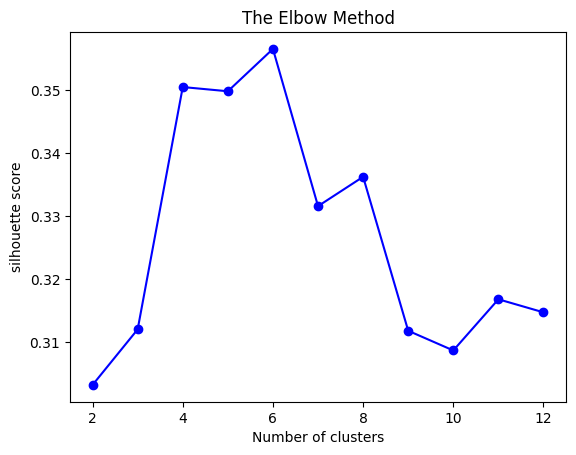

In [ ]:
plt.plot(k,scores,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.title('The Elbow Method')

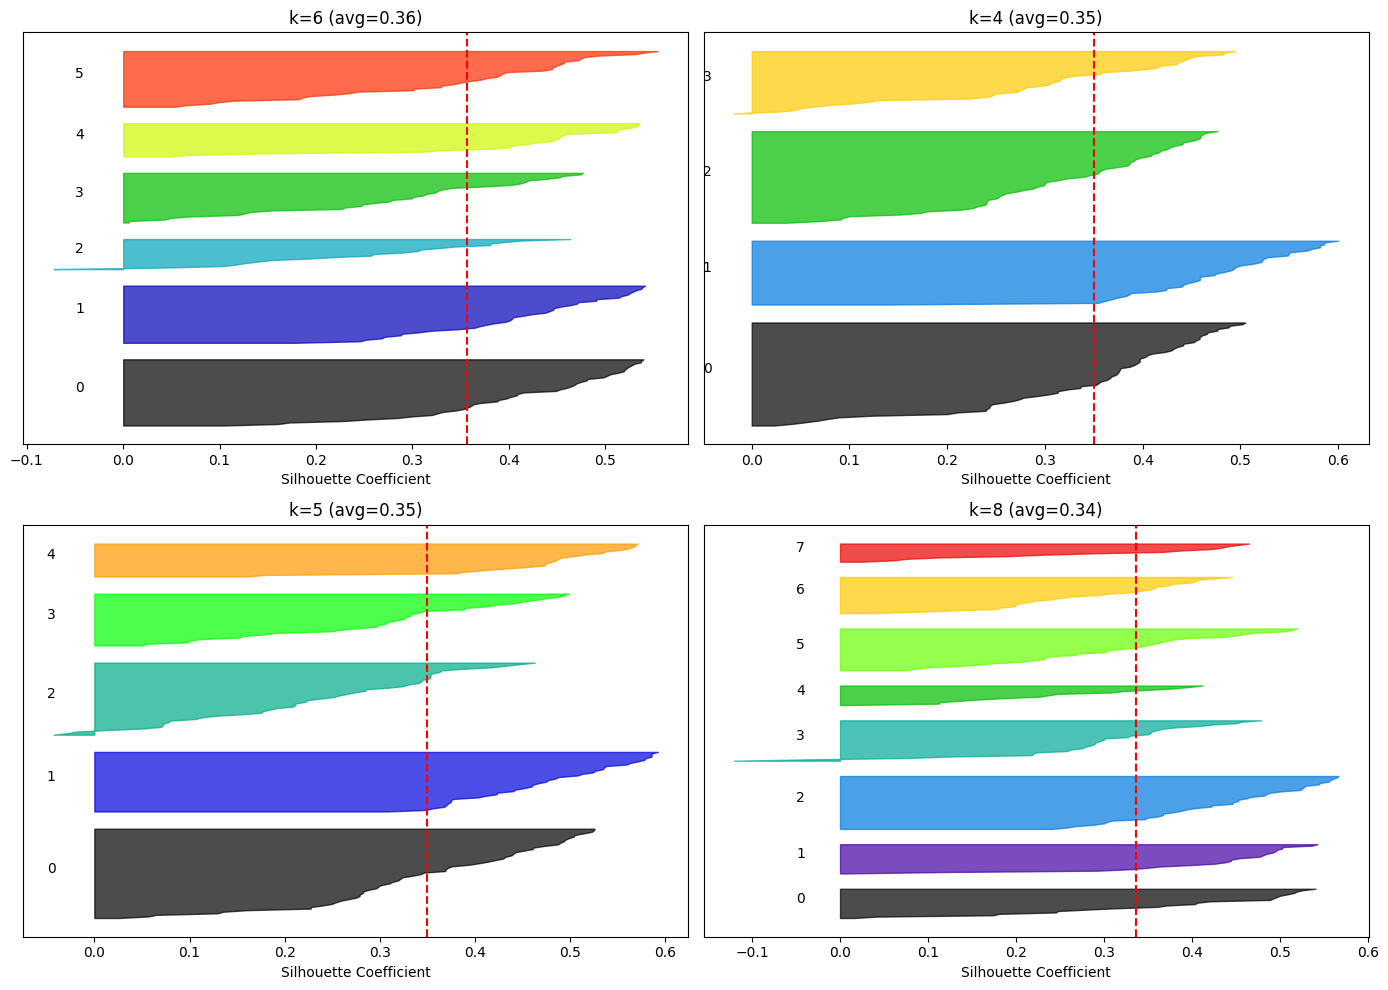

In [ ]:
plot_best4_kmeans_silhouette(df_scaled,range(2,11))

In [ ]:
model_kmeans=KMeans(n_clusters=6,init='k-means++',random_state=42)
model_kmeans.fit(df_scaled)

Y3 = model_kmeans.predict(df_scaled)
print(silhouette_score(df_scaled, Y3))
print(Y3)

0.356485834425401
[4 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 0 4 2 5 2 4 0 5 5 5 0 5 5 0 0 0 0 0 5 0 0 5 0 0 0 5 0 0 5 5 0 0 0 0
 0 5 0 5 5 0 0 5 0 0 5 0 0 5 5 0 0 5 0 5 5 5 0 5 0 5 5 0 0 5 0 5 0 0 0 0 0
 5 5 5 5 5 0 0 0 0 5 5 5 1 5 1 3 1 3 1 3 1 5 1 3 1 3 1 3 1 3 1 5 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [ ]:
centroids=model_kmeans.cluster_centers_
centroids

array([[ 1.25472096, -0.24021294, -0.04399777,  0.42222222],
       [-0.44191719,  0.99158305,  1.23950275,  0.46153846],
       [ 0.47895722, -1.30822992, -1.19644353,  0.38095238],
       [ 0.17329545,  1.06645385, -1.2980103 ,  0.58823529],
       [-0.99396865, -1.34734766,  1.06404834,  0.43478261],
       [-0.85043527, -0.14894113, -0.04147777,  0.34210526]])

In [ ]:
pca = PCA(n_components=3)
X_pca_2d = pca.fit_transform(df_scaled)

print(f'Number of Components selected: {X_pca_2d.shape[1]}')

Number of Components selected: 3


<Axes: >

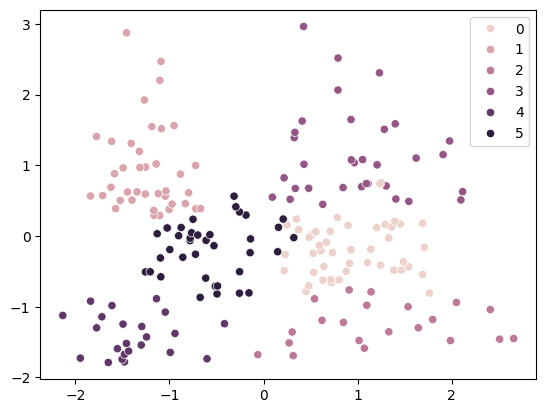

In [ ]:
sns.scatterplot(x=X_pca_2d[:,0],y=X_pca_2d[:,1],hue=model_kmeans.labels_)

In [ ]:
fig = px.scatter_3d(X_pca_2d, x=X_pca_2d[:,0], y=X_pca_2d[:,1], z=X_pca_2d[:,2]
                ,color=model_kmeans.labels_)
fig.show()

### DBSCAN

In [ ]:
eps_values = [0.01,0.001,0.1,1,1.5,2,2.5,3,3.5,4.5,5,10,11.5,12,12.5,13]
min_samples_values = range(3, 10)
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(df_scaled)


        if len(set(labels)) > 1 and len(set(labels)) != 1:
            score = silhouette_score(df_scaled, labels)
            results.append({
                "eps": eps,
                "min_samples": min_samples,
                "silhouette_score": score
            })


results_df = pd.DataFrame(results)

best_results = results_df.sort_values(by="silhouette_score", ascending=False).head(5)
print(best_results)

   eps  min_samples  silhouette_score
2    1            5          0.099884
4    1            7          0.099884
3    1            6          0.099884
5    1            8          0.098882
0    1            3          0.068230


In [ ]:
model_DBSCAN=DBSCAN(eps=1, min_samples=5)
labels=model_DBSCAN.fit_predict(df_scaled)

<Axes: >

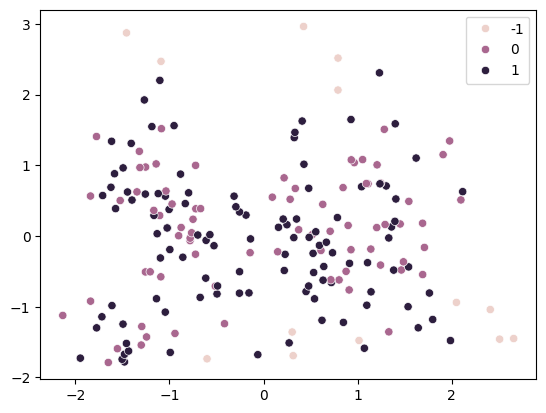

In [ ]:
sns.scatterplot(x=X_pca_2d[:,0],y=X_pca_2d[:,1],hue=labels)

In [ ]:
fig = px.scatter_3d(X_pca_2d, x=X_pca_2d[:,1], y=X_pca_2d[:,2], z=X_pca_2d[:,0]
                ,color=labels)
fig.show()

## Case 4: without scaling

In [ ]:
df_scaled=df
df_scaled

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


### Kmeans

In [ ]:
interia=[]
k=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_scaled)
  interia.append(kmeans.inertia_)
  k.append(i)

Text(0.5, 1.0, 'The Elbow Method')

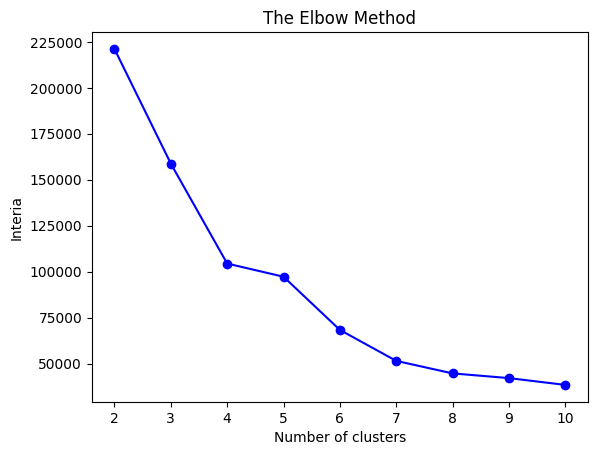

In [ ]:
plt.plot(k,interia,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Interia')
plt.title('The Elbow Method')

In [ ]:
scores=[]
k=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_scaled)
  scores.append(silhouette_score(df_scaled,kmeans.labels_))
  print(i,scores[-1])
  k.append(i)



2 0.3318732932946229
3 0.33545193002465656
4 0.4052954330641215
5 0.3574050351346702
6 0.41532495778518114
7 0.44172063782131477
8 0.43249096868827536
9 0.40888277359609176
10 0.39641637496481097


Text(0.5, 1.0, 'The Elbow Method')

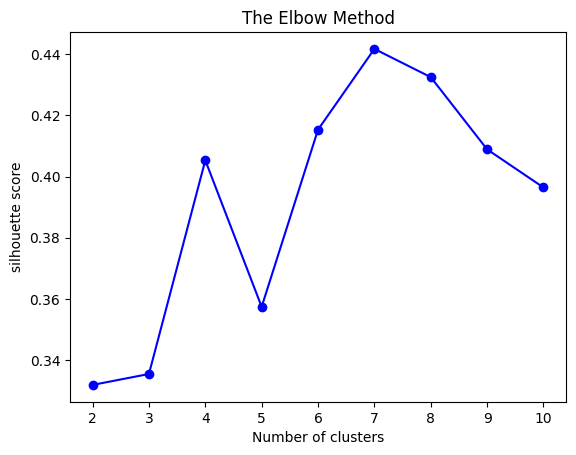

In [ ]:
plt.plot(k,scores,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.title('The Elbow Method')

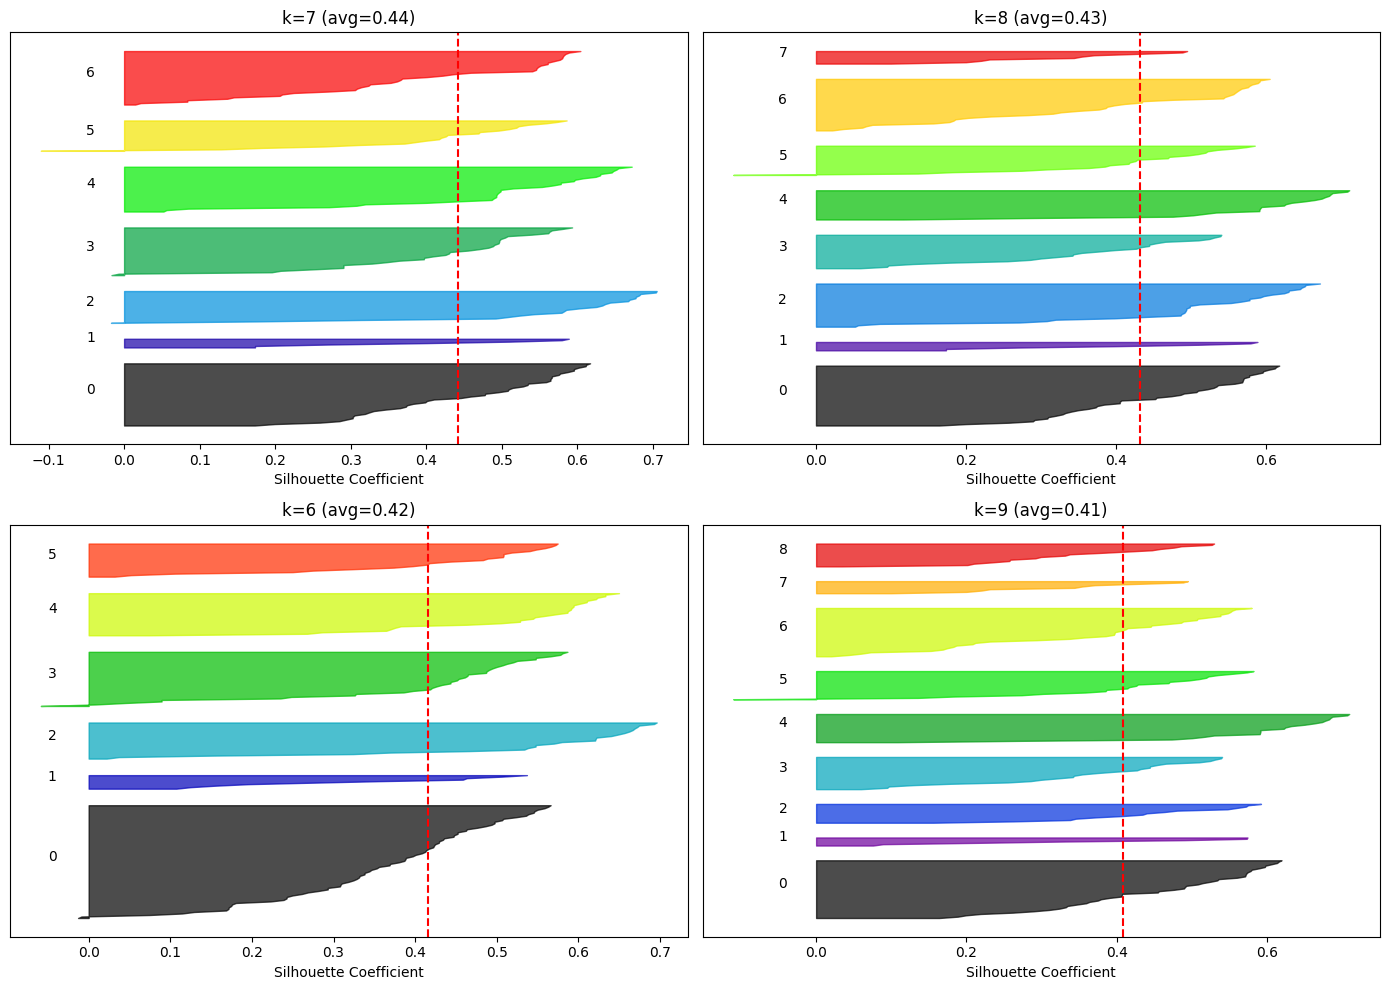

In [ ]:
plot_best4_kmeans_silhouette(df_scaled,range(2,11))

In [ ]:
model_kmeans=KMeans(n_clusters=7,init='k-means++',random_state=42)
model_kmeans.fit(df_scaled)


Y4 = model_kmeans.predict(df_scaled)
print(silhouette_score(df_scaled, Y4))
print(Y4)

0.44172063782131477
[5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5
 2 5 2 0 2 5 2 5 2 0 6 6 6 0 6 6 0 0 0 0 0 6 0 0 6 0 0 0 6 0 0 6 6 0 0 0 0
 0 6 0 6 6 0 0 6 0 0 6 0 0 6 6 0 0 6 0 6 6 6 0 6 0 6 6 0 0 6 0 6 0 0 0 0 0
 6 6 6 6 6 0 0 0 0 6 6 6 4 6 4 6 4 3 4 3 4 6 4 3 4 3 4 3 4 3 4 6 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [ ]:
centroids=model_kmeans.cluster_centers_

In [ ]:
pca_2D = PCA(n_components=3)
X_pca_2d = pca_2D.fit_transform(df_scaled)

print(f'Number of Components selected: {X_pca_2d.shape[1]}')

Number of Components selected: 3


<Axes: >

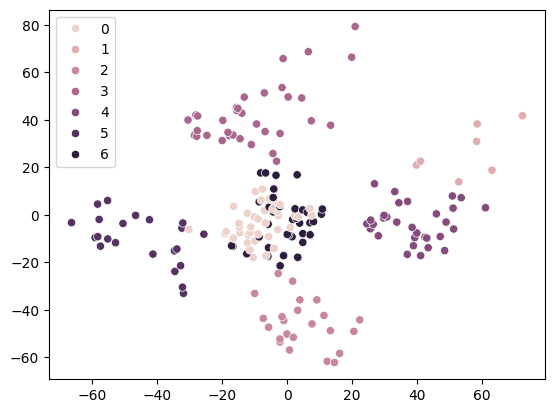

In [ ]:
sns.scatterplot(x=X_pca_2d[:,0],y=X_pca_2d[:,1],hue=model_kmeans.labels_)

In [ ]:
fig = px.scatter_3d(X_pca_2d, x=X_pca_2d[:,1], y=X_pca_2d[:,2], z=X_pca_2d[:,0]
                ,color=model_kmeans.labels_)
fig.show()

### DBSCAN

In [ ]:
eps_values = [0.01,0.001,0.1,1,1.5,2,2.5,3,3.5,4.5,5,10,11.5,12,12.5,13]
min_samples_values = range(3, 10)
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(df_scaled)


        if len(set(labels)) > 1 and len(set(labels)) != 1:
            score = silhouette_score(df_scaled, labels)
            results.append({
                "eps": eps,
                "min_samples": min_samples,
                "silhouette_score": score
            })


results_df = pd.DataFrame(results)

best_results = results_df.sort_values(by="silhouette_score", ascending=False).head(5)
print(best_results)

     eps  min_samples  silhouette_score
31  12.5            4          0.255412
32  12.5            5          0.233992
40  13.0            6          0.230579
43  13.0            9          0.216610
34  12.5            7          0.208116


In [ ]:
model_DBSCAN=DBSCAN(eps=12.5, min_samples=4)
labels=model_DBSCAN.fit_predict(df_scaled)

<Axes: >

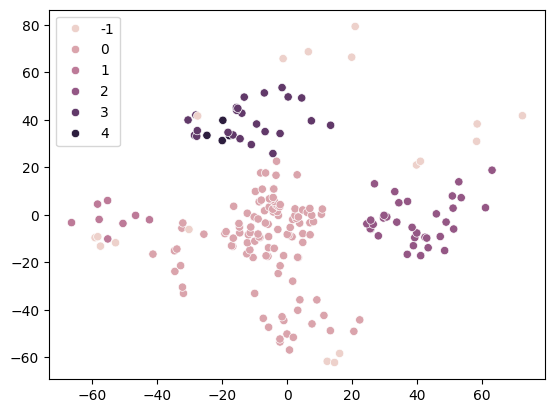

In [ ]:
sns.scatterplot(x=X_pca_2d[:,0],y=X_pca_2d[:,1],hue=labels)

In [ ]:
fig = px.scatter_3d(X_pca_2d, x=X_pca_2d[:,1], y=X_pca_2d[:,2], z=X_pca_2d[:,0]
                ,color=labels)
fig.show()

# feature selection

In [ ]:
from sklearn.feature_selection import VarianceThreshold

X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
thresholds=[0.1,0.2,0.3,0.4,0.5]

for threshold in thresholds:
    selector = VarianceThreshold(threshold=threshold)
    selector.fit(X)
    selected_features = X.columns[selector.get_support()]
    print(f"Selected Features with threshold {threshold}:", list(selected_features))

Selected Features with threshold 0.1: ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Selected Features with threshold 0.2: ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Selected Features with threshold 0.3: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Selected Features with threshold 0.4: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Selected Features with threshold 0.5: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


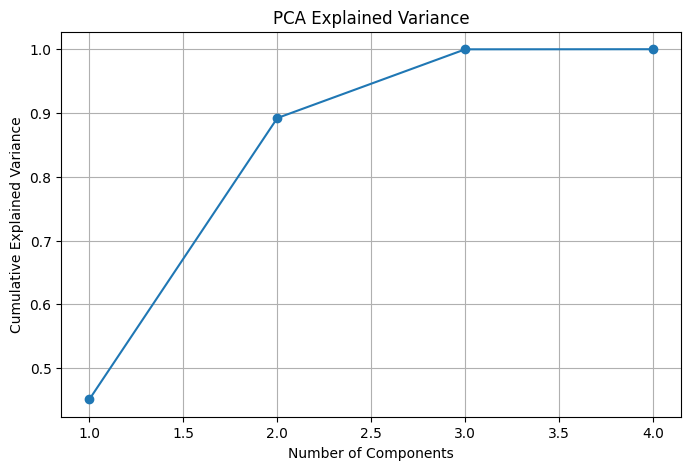

In [ ]:
pca = PCA().fit(df)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

# modeling using three featurs only

## Age & Annual Income & Spending Score

###Case 5: with scaling

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Gender',axis=1))

df_scaled5 = pd.DataFrame(df_scaled, columns=df.columns[1:])

df_scaled5.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


#### Kmeans

In [ ]:
interia=[]
k=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_scaled5)
  interia.append(kmeans.inertia_)
  k.append(i)

Text(0.5, 1.0, 'The Elbow Method')

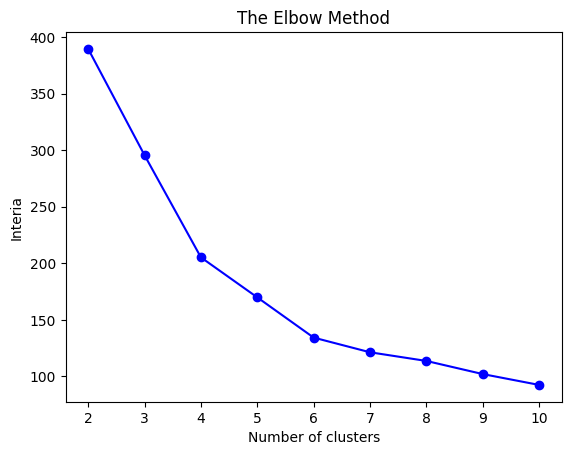

In [ ]:
plt.plot(k,interia,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Interia')
plt.title('The Elbow Method')

In [ ]:
scores=[]
k=[]
for i in range(2,13):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_scaled5)
  scores.append(silhouette_score(df_scaled5,kmeans.labels_))
  print(i,scores[-1])
  k.append(i)

2 0.33547192894004574
3 0.3579234303882264
4 0.4039582785148566
5 0.40846873777345605
6 0.43106526216603014
7 0.410091114520974
8 0.3673663165322295
9 0.37442148555078425
10 0.36186970479722974
11 0.40861878459370105
12 0.35689674084203643


Text(0.5, 1.0, 'The Elbow Method')

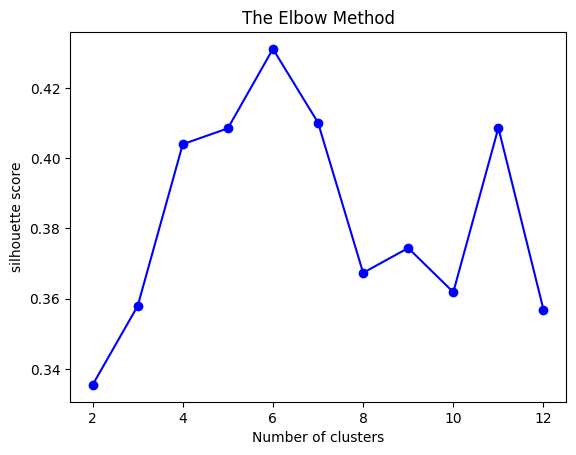

In [ ]:
plt.plot(k,scores,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.title('The Elbow Method')

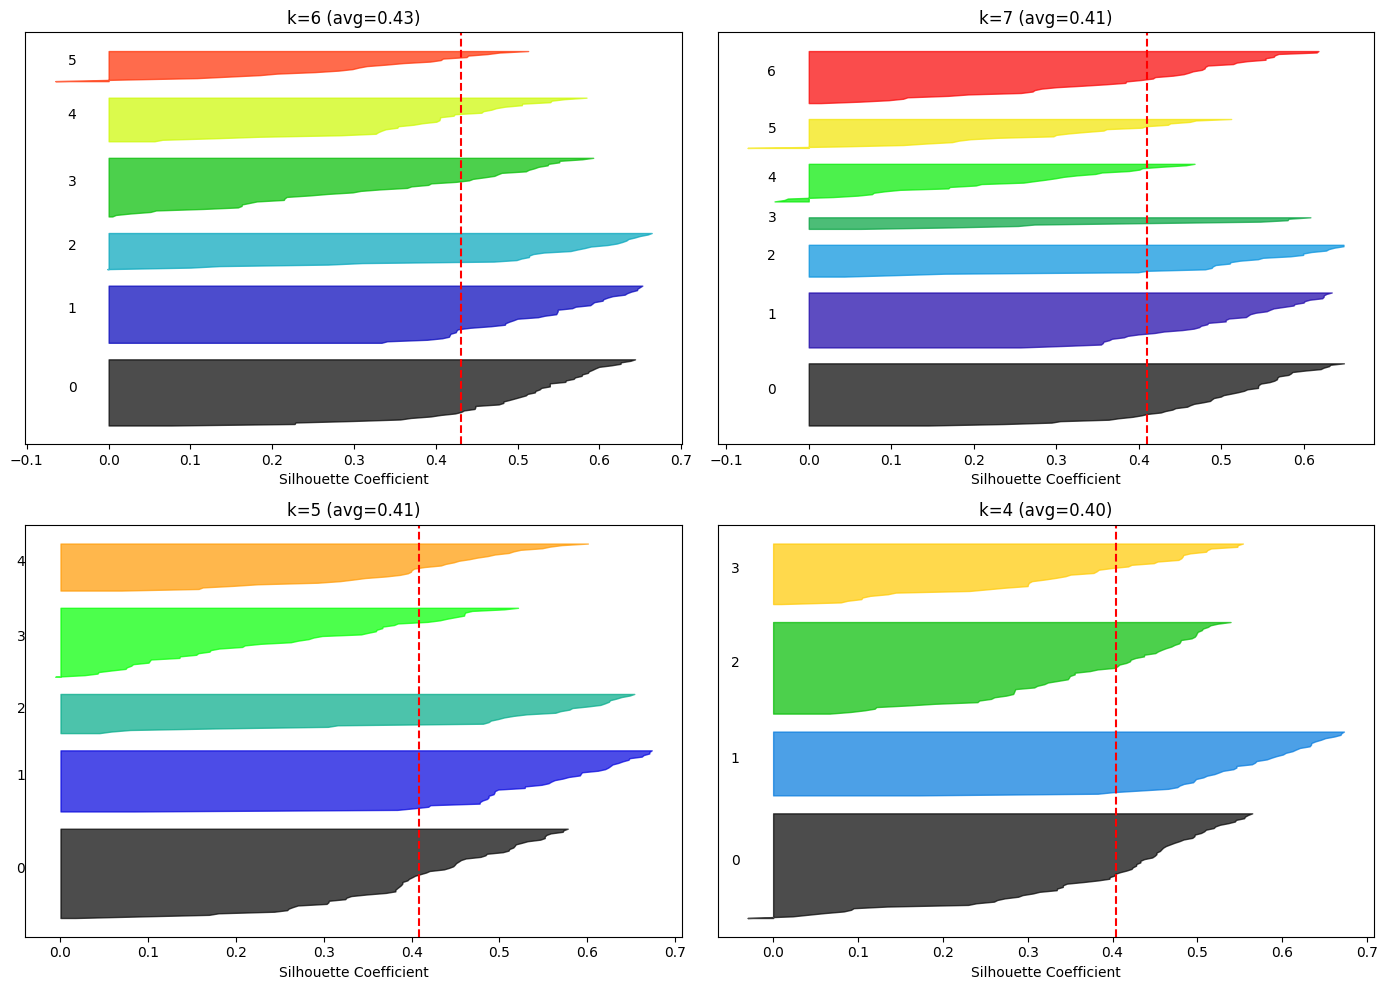

In [ ]:
plot_best4_kmeans_silhouette(df_scaled5,range(2,11))

In [ ]:
model_kmeans=KMeans(n_clusters=6,init='k-means++',random_state=42)
model_kmeans.fit(df_scaled5)

Y5 = model_kmeans.predict(df_scaled5)
print(silhouette_score(df_scaled5, Y5))
print(Y5)

0.43106526216603014
[2 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5
 2 5 2 0 2 5 2 5 2 0 3 3 3 0 2 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 4 1 4 1 4 1 3 1 3 1 4 1 3 1 4 1 3 1 3 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 0 1 3 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


In [ ]:
centroids=model_kmeans.cluster_centers_

In [ ]:
pca = PCA(n_components=3)
X_pca_2d = pca.fit_transform(df_scaled5)

print(f'Number of Components selected: {X_pca_2d.shape[1]}')

Number of Components selected: 3


<Axes: >

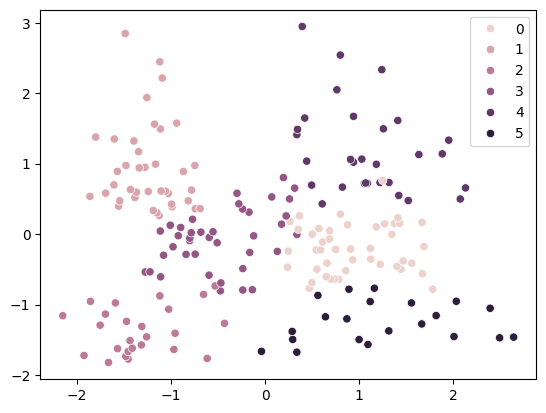

In [ ]:
sns.scatterplot(x=X_pca_2d[:,0],y=X_pca_2d[:,1],hue=model_kmeans.labels_)

In [ ]:
fig = px.scatter_3d(X_pca_2d, x=X_pca_2d[:,1], y=X_pca_2d[:,2], z=X_pca_2d[:,0]
                ,color=model_kmeans.labels_)
fig.show()

#### DBSCAN

In [ ]:
eps_values = [0.01,0.001,0.1,1,1.5,2,2.5,3,3.5,4.5,5,10,11.5,12,12.5,13]
min_samples_values = range(3, 10)
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(df_scaled5)


        if len(set(labels)) > 1 and len(set(labels)) != 1:
            score = silhouette_score(df_scaled5, labels)
            results.append({
                "eps": eps,
                "min_samples": min_samples,
                "silhouette_score": score
            })


results_df = pd.DataFrame(results)

best_results = results_df.sort_values(by="silhouette_score", ascending=False).head(5)
print(best_results)

   eps  min_samples  silhouette_score
6    1            9          0.313856
2    1            5          0.313125
3    1            6          0.294521
4    1            7          0.294521
5    1            8          0.294521


In [ ]:
model_DBSCAN=DBSCAN(eps=1, min_samples=9)
labels=model_DBSCAN.fit_predict(df_scaled5)

<Axes: >

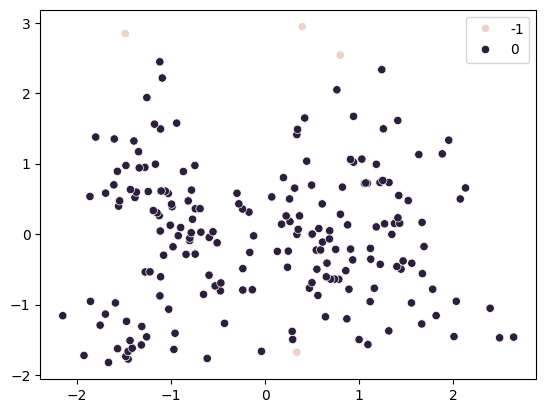

In [ ]:
sns.scatterplot(x=X_pca_2d[:,0],y=X_pca_2d[:,1],hue=labels)

In [ ]:
fig = px.scatter_3d(X_pca_2d, x=X_pca_2d[:,1], y=X_pca_2d[:,2], z=X_pca_2d[:,0]
                ,color=labels)
fig.show()

###Case 6: without scaling

In [ ]:
df_scaled=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df_scaled

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


#### Kmeans

In [ ]:
interia=[]
k=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_scaled)
  interia.append(kmeans.inertia_)
  k.append(i)

Text(0.5, 1.0, 'The Elbow Method')

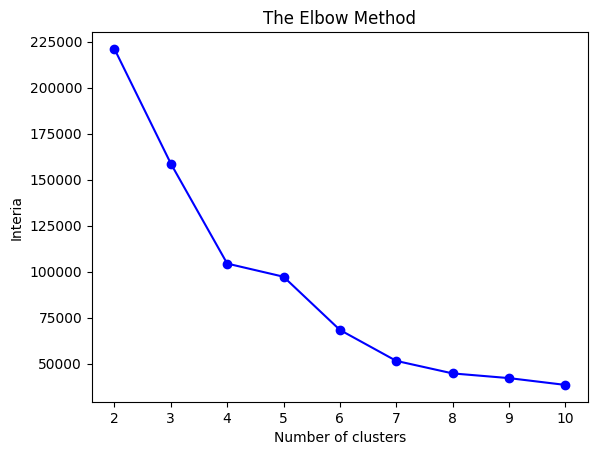

In [ ]:
plt.plot(k,interia,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Interia')
plt.title('The Elbow Method')

In [ ]:
scores=[]
k=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_scaled)
  scores.append(silhouette_score(df_scaled,kmeans.labels_))
  print(i,scores[-1])
  k.append(i)

2 0.3319705845155097
3 0.335580238662684
4 0.40546302077733304
5 0.3575963460506624
6 0.4155672337697055
7 0.4420336177238127
8 0.43280878015743623
9 0.4092704336279867
10 0.39682188832916687


Text(0.5, 1.0, 'The Elbow Method')

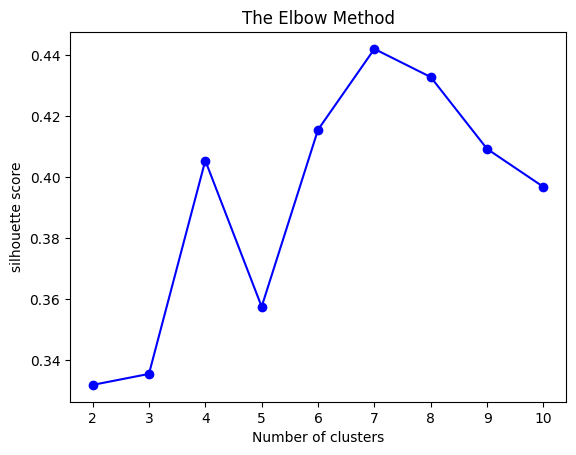

In [ ]:
plt.plot(k,scores,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.title('The Elbow Method')

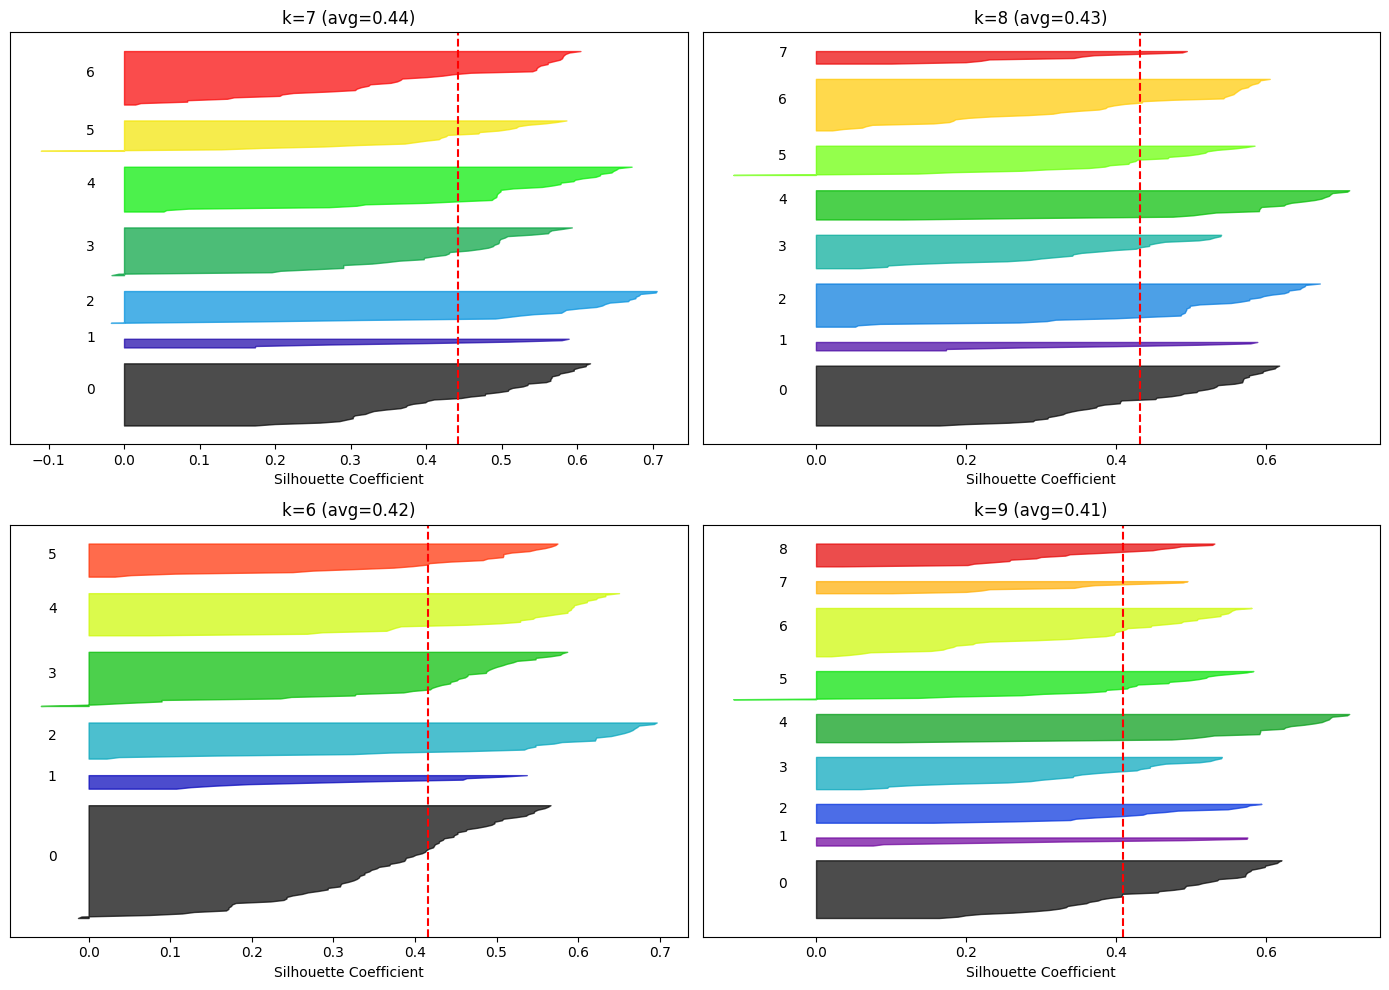

In [ ]:
plot_best4_kmeans_silhouette(df_scaled,range(2,11))

In [ ]:
model_kmeans=KMeans(n_clusters=7,init='k-means++',random_state=42)
model_kmeans.fit(df_scaled)

Y6 = model_kmeans.predict(df_scaled)
print(silhouette_score(df_scaled, Y6))
print(Y6)

0.4420336177238127
[5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5
 2 5 2 0 2 5 2 5 2 0 6 6 6 0 6 6 0 0 0 0 0 6 0 0 6 0 0 0 6 0 0 6 6 0 0 0 0
 0 6 0 6 6 0 0 6 0 0 6 0 0 6 6 0 0 6 0 6 6 6 0 6 0 6 6 0 0 6 0 6 0 0 0 0 0
 6 6 6 6 6 0 0 0 0 6 6 6 4 6 4 6 4 3 4 3 4 6 4 3 4 3 4 3 4 3 4 6 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [ ]:
centroids=model_kmeans.cluster_centers_

In [ ]:
pca_2D = PCA(n_components=3)
X_pca_2d = pca_2D.fit_transform(df_scaled)

print(f'Number of Components selected: {X_pca_2d.shape[1]}')

Number of Components selected: 3


<Axes: >

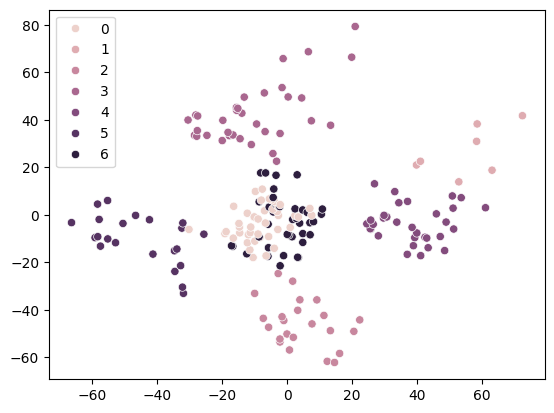

In [ ]:
sns.scatterplot(x=X_pca_2d[:,0],y=X_pca_2d[:,1],hue=model_kmeans.labels_)

In [ ]:
fig = px.scatter_3d(X_pca_2d, x=X_pca_2d[:,1], y=X_pca_2d[:,2], z=X_pca_2d[:,0]
                ,color=model_kmeans.labels_)
fig.show()

#### DBSCAN

In [ ]:
eps_values = [0.01,0.001,0.1,1,1.5,2,2.5,3,3.5,4.5,5,10,11.5,12,12.5,13]
min_samples_values = range(3, 10)
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(df_scaled)


        if len(set(labels)) > 1 and len(set(labels)) != 1:
            score = silhouette_score(df_scaled, labels)
            results.append({
                "eps": eps,
                "min_samples": min_samples,
                "silhouette_score": score
            })


results_df = pd.DataFrame(results)

best_results = results_df.sort_values(by="silhouette_score", ascending=False).head(5)
print(best_results)

     eps  min_samples  silhouette_score
31  12.5            4          0.255563
32  12.5            5          0.234133
43  13.0            9          0.231794
40  13.0            6          0.230724
18  11.5            5          0.211564


In [ ]:
model_DBSCAN=DBSCAN(eps=12.5, min_samples=4)
labels=model_DBSCAN.fit_predict(df_scaled)

<Axes: >

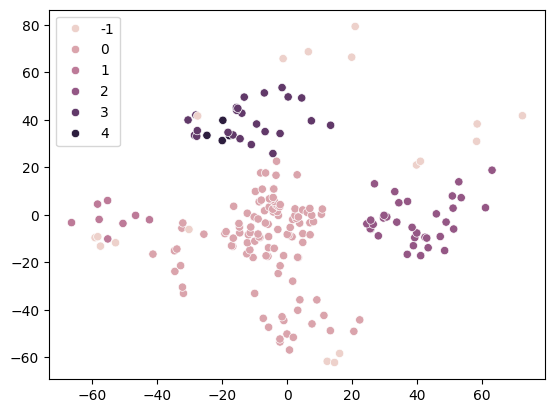

In [ ]:
sns.scatterplot(x=X_pca_2d[:,0],y=X_pca_2d[:,1],hue=labels)

In [ ]:
fig = px.scatter_3d(X_pca_2d, x=X_pca_2d[:,1], y=X_pca_2d[:,2], z=X_pca_2d[:,0]
                ,color=labels)
fig.show()

## Gender & Annual Income & Spending Score for Approving

###Case 7: with scaling

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Gender',axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[1:])
df_scaled['Gender']=df['Gender']
df_scaled.drop('Age',axis=1,inplace=True)
df_scaled.head()

,Annual Income (k$),Spending Score (1-100),Gender
0,-1.738999,-0.434801,1
1,-1.738999,1.195704,1
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,0


#### Kmeans

In [ ]:
interia=[]
k=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_scaled)
  interia.append(kmeans.inertia_)
  k.append(i)

Text(0.5, 1.0, 'The Elbow Method')

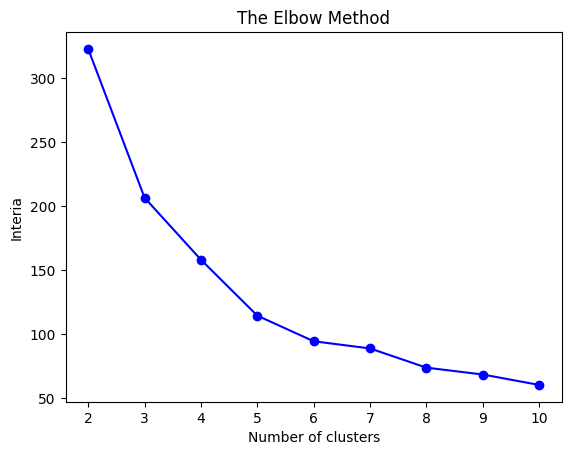

In [ ]:
plt.plot(k,interia,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Interia')
plt.title('The Elbow Method')

In [ ]:
scores=[]
k=[]
for i in range(2,17):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_scaled)
  scores.append(silhouette_score(df_scaled,kmeans.labels_))
  print(i,scores[-1])
  k.append(i)

2 0.34064342984650586
3 0.3890164736390268
4 0.39645669293559604
5 0.4336047269011863
6 0.4396588981273848
7 0.40489973271159635
8 0.4372971572757027
9 0.4386577589281142
10 0.45013089941644985
11 0.4576695842222772
12 0.4611228919119196
13 0.4681550307262443
14 0.472249721450076
15 0.47425292291272597
16 0.45021954514185564


Text(0.5, 1.0, 'The Elbow Method')

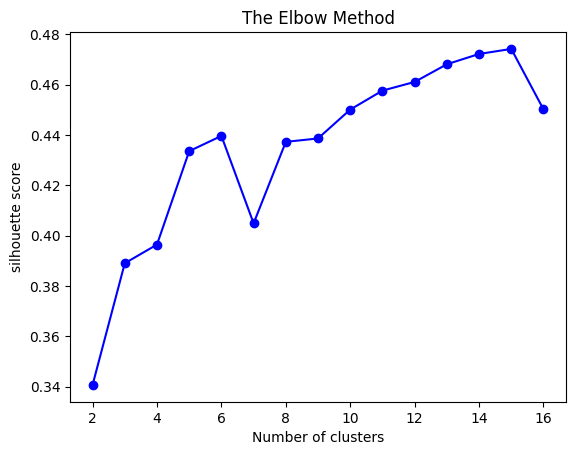

In [ ]:
plt.plot(k,scores,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.title('The Elbow Method')

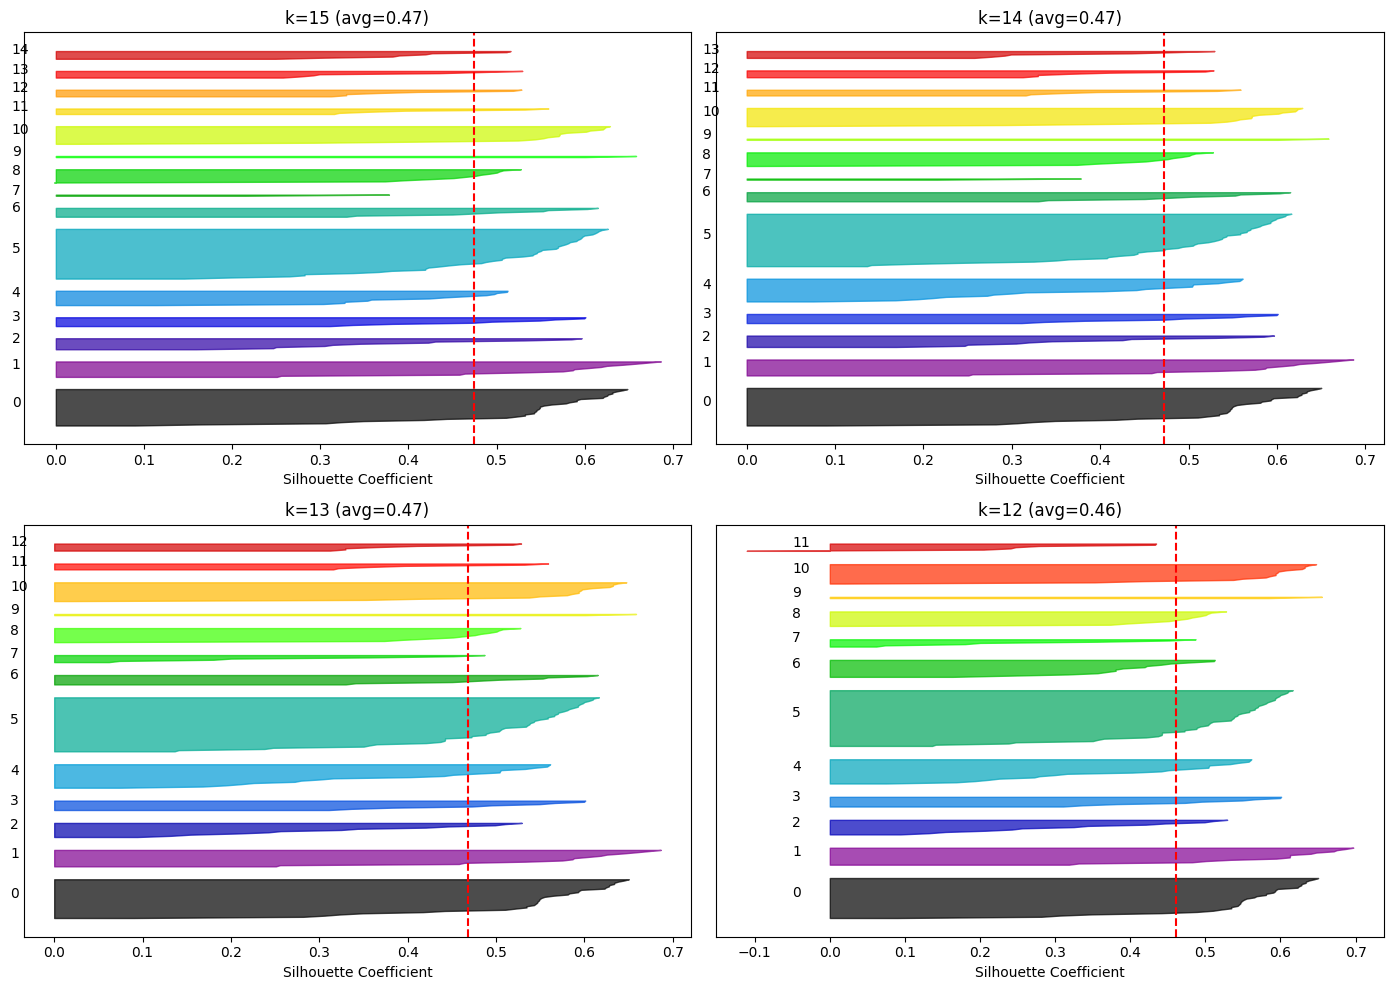

In [ ]:
plot_best4_kmeans_silhouette(df_scaled,range(2,17))

In [ ]:
model_kmeans=KMeans(n_clusters=15,init='k-means++',random_state=42)
model_kmeans.fit(df_scaled)

Y7 = model_kmeans.predict(df_scaled)
print(silhouette_score(df_scaled, Y7))
print(Y7)

0.47425292291272597
[14  3  4  8  4  8  4  8 14  8 14  8  4  8 14  3  4  3 14  8 14  3  4  3
  4  3  4  3  4  8 14  8 14  3  4  8  4  8  4  8  4  3  0  5  4  8  5  5
  5  5  5  0  5  0  5  0  5  0  5  0  0  0  5  5  0  0  5  5  0  5  0  5
  5  5  0  0  5  0  5  5  0  0  0  5  5  0  5  5  5  5  5  0  0  5  5  0
  5  5  0  0  5  5  0  0  0  5  5  0  0  0  0  5  5  0  5  5  5  5  5  5
  0  5  5  6  2  1  0  6 10 12 10 12  2  1 10  1  2 12 10  1  2  6  2  1
 10  6 10  1  2  6 10  6  2  1  2  1 10  1 10  1  2  1 10  1 10  1 10  1
  2 12 10 12 10  6  2  1 10 12 10  6 13 11 10 11 13  6 13 12 13 11 13 11
  7 11 13 11 13  9  7  9]


In [ ]:
centroids=model_kmeans.cluster_centers_

In [ ]:
pca = PCA(n_components=3)
X_pca_2d = pca.fit_transform(df_scaled)

print(f'Number of Components selected: {X_pca_2d.shape[1]}')

Number of Components selected: 3


<Axes: >

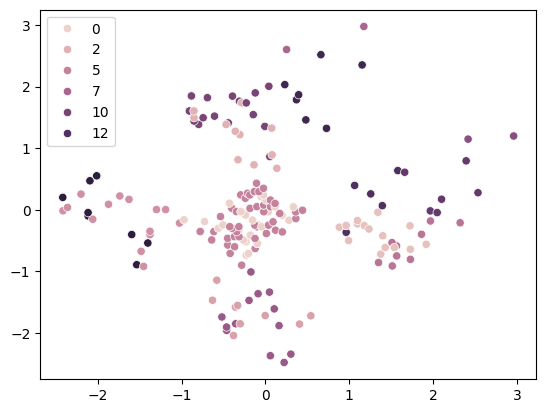

In [ ]:
sns.scatterplot(x=X_pca_2d[:,0],y=X_pca_2d[:,1],hue=model_kmeans.labels_)

In [ ]:
fig = px.scatter_3d(X_pca_2d, x=X_pca_2d[:,1], y=X_pca_2d[:,2], z=X_pca_2d[:,0]
                ,color=model_kmeans.labels_)
fig.show()

#### DBSCAN

In [ ]:
eps_values = [0.01,0.001,0.1,1,1.5,2,2.5,3,3.5,4.5,5,10,11.5,12,12.5,13]
min_samples_values = range(3, 10)
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(df_scaled)


        if len(set(labels)) > 1 and len(set(labels)) != 1:
            score = silhouette_score(df_scaled, labels)
            results.append({
                "eps": eps,
                "min_samples": min_samples,
                "silhouette_score": score
            })


results_df = pd.DataFrame(results)

best_results = results_df.sort_values(by="silhouette_score", ascending=False).head(5)
print(best_results)

   eps  min_samples  silhouette_score
3  1.0            3          0.172699
9  1.0            9          0.168148
7  1.0            7          0.162178
8  1.0            8          0.162178
4  1.0            4          0.144464


In [ ]:
model_DBSCAN=DBSCAN(eps=1, min_samples=9)
labels=model_DBSCAN.fit_predict(df_scaled)

<Axes: >

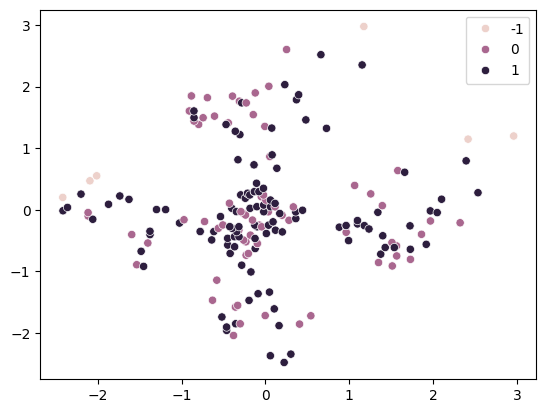

In [ ]:
sns.scatterplot(x=X_pca_2d[:,0],y=X_pca_2d[:,1],hue=labels)

In [ ]:
fig = px.scatter_3d(X_pca_2d, x=X_pca_2d[:,1], y=X_pca_2d[:,2], z=X_pca_2d[:,0]
                ,color=labels)
fig.show()

### Case 8: without scaling

In [ ]:
df_scaled=df[['Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]
df_scaled

,Gender,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,1,15,81
2,0,16,6
3,0,16,77
4,0,17,40
...,...,...,...
195,0,120,79
196,0,126,28
197,1,126,74
198,1,137,18


#### Kmeans

In [ ]:
interia=[]
k=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_scaled)
  interia.append(kmeans.inertia_)
  k.append(i)

Text(0.5, 1.0, 'The Elbow Method')

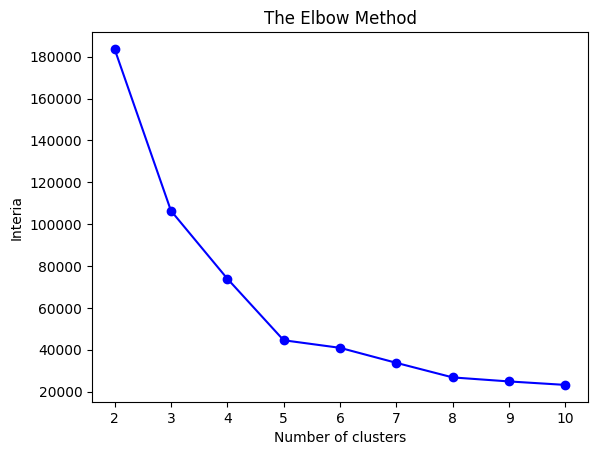

In [ ]:
plt.plot(k,interia,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Interia')
plt.title('The Elbow Method')

In [ ]:
scores=[]
k=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_scaled)
  scores.append(silhouette_score(df_scaled,kmeans.labels_))
  print(i,scores[-1])
  k.append(i)

2 0.39545585408755346
3 0.46733000902034116
4 0.4934199104920511
5 0.5534496268497305
6 0.5122320574513162
7 0.5010537947330135
8 0.4955673870982722
9 0.45513536610887323
10 0.44183900866842035


Text(0.5, 1.0, 'The Elbow Method')

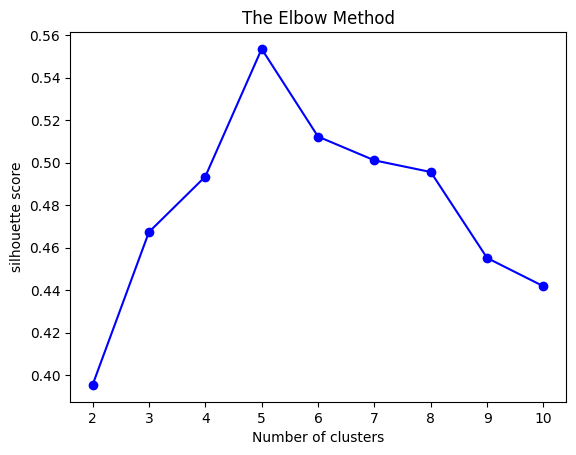

In [ ]:
plt.plot(k,scores,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.title('The Elbow Method')

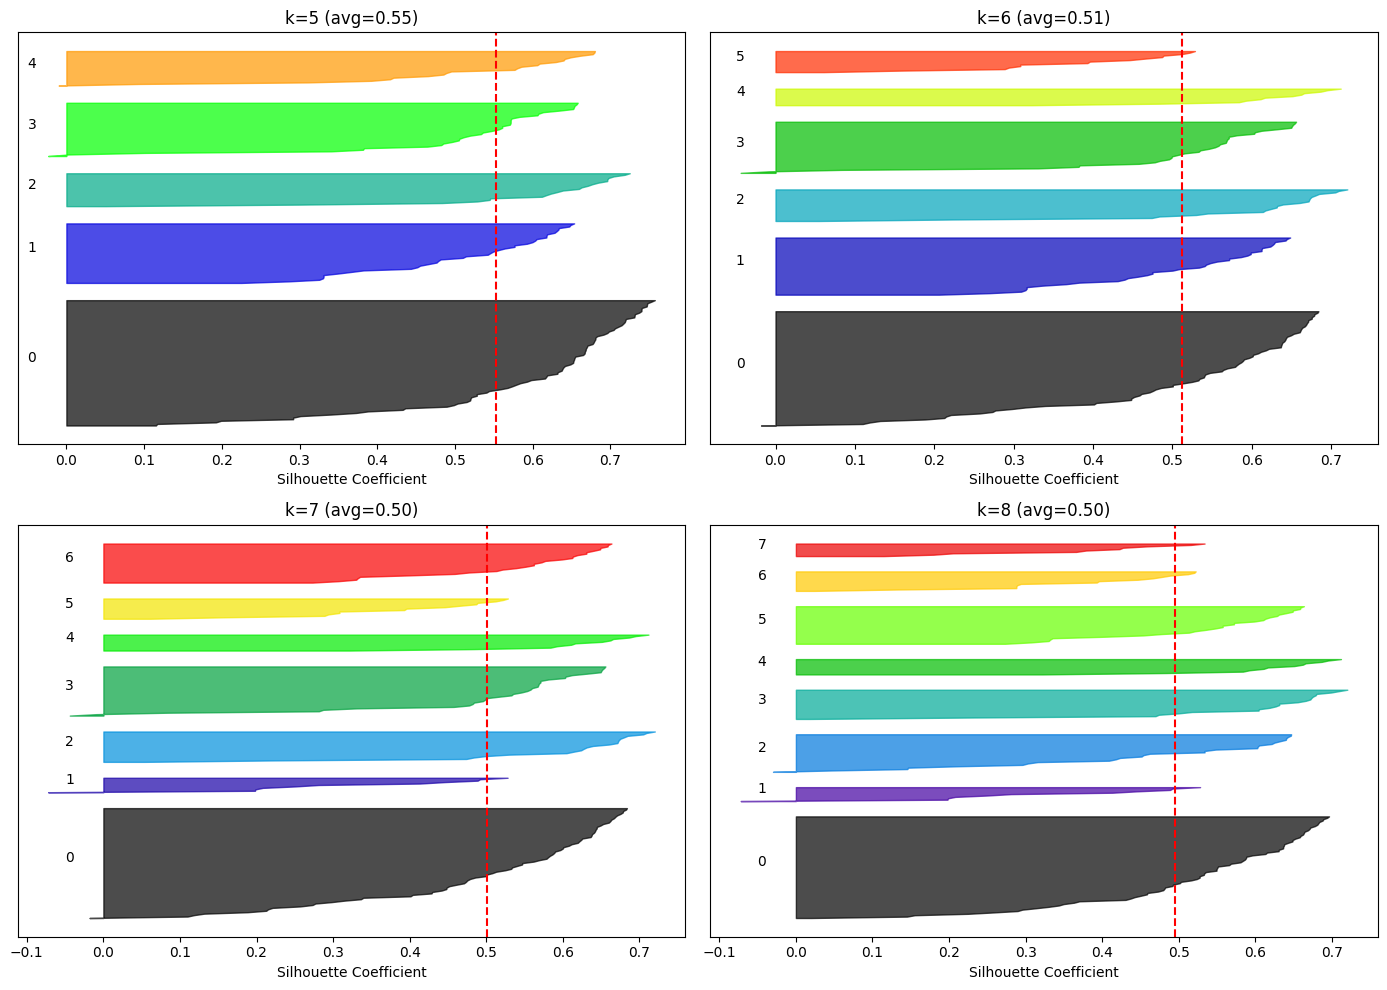

In [ ]:
plot_best4_kmeans_silhouette(df_scaled,range(2,11))

In [ ]:
model_kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
model_kmeans.fit(df_scaled)

Y8 = model_kmeans.predict(df_scaled)
print(silhouette_score(df_scaled, Y8))
print(Y8)

0.5534496268497305
[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [ ]:
centroids=model_kmeans.cluster_centers_

In [ ]:
pca_2D = PCA(n_components=3)
X_pca_2d = pca_2D.fit_transform(df_scaled)

print(f'Number of Components selected: {X_pca_2d.shape[1]}')

Number of Components selected: 3


<Axes: >

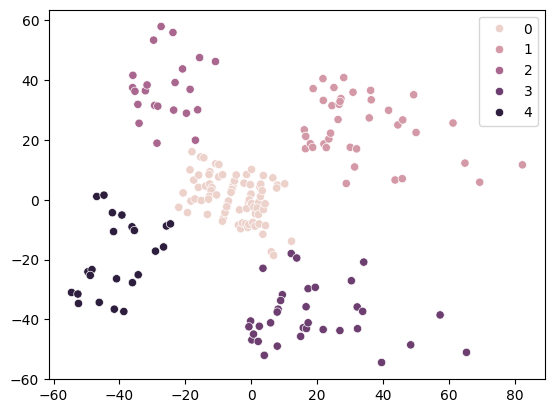

In [ ]:
sns.scatterplot(x=X_pca_2d[:,0],y=X_pca_2d[:,1],hue=model_kmeans.labels_)

In [ ]:
fig = px.scatter_3d(X_pca_2d, x=X_pca_2d[:,1], y=X_pca_2d[:,2], z=X_pca_2d[:,0]
                ,color=model_kmeans.labels_)
fig.show()

#### DBSCAN

In [ ]:
eps_values = [0.01,0.001,0.1,1,1.5,2,2.5,3,3.5,4.5,5,10,11.5,12,12.5,13]
min_samples_values = range(3, 10)
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(df_scaled)


        if len(set(labels)) > 1 and len(set(labels)) != 1:
            score = silhouette_score(df_scaled, labels)
            results.append({
                "eps": eps,
                "min_samples": min_samples,
                "silhouette_score": score
            })


results_df = pd.DataFrame(results)

best_results = results_df.sort_values(by="silhouette_score", ascending=False).head(5)
print(best_results)

     eps  min_samples  silhouette_score
59  12.0            9          0.425575
52  11.5            9          0.422905
43  10.0            7          0.420955
66  12.5            9          0.413979
41  10.0            5          0.412140


In [ ]:
model_DBSCAN=DBSCAN(eps=12, min_samples=9)
labels=model_DBSCAN.fit_predict(df_scaled)

<Axes: >

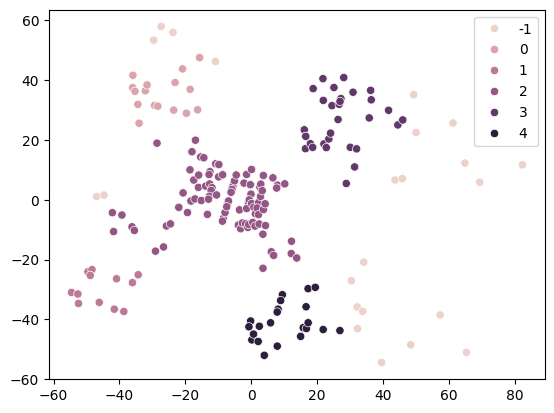

In [ ]:
sns.scatterplot(x=X_pca_2d[:,0],y=X_pca_2d[:,1],hue=labels)

In [ ]:
fig = px.scatter_3d(X_pca_2d, x=X_pca_2d[:,1], y=X_pca_2d[:,2], z=X_pca_2d[:,0]
                ,color=labels)
fig.show()

# Comparing cases based on classification results: Downstream test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

Y_list = [Y,Y2,Y3,Y4,Y5,Y6,Y7,Y8] # List with different clustering results, used as labels in supervised learning.

logistic_regression_classifier = LogisticRegression()

for i in range(1,9):
  x_train, x_test, y_train, y_test = train_test_split(X, Y_list[i-1], test_size=0.2, random_state=42)
  if(i%2 == 1):
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

  logistic_regression_classifier.fit(x_train, y_train)

  y_train_pred = logistic_regression_classifier.predict(x_train)
  y_pred = logistic_regression_classifier.predict(x_test)

  accuracy = accuracy_score(y_train, y_train_pred)
  print('For case', i, ' : \n')
  print('Logistic regression training accuracy: ', accuracy, '\n')
  accuracy = accuracy_score(y_test, y_pred)
  print('Logistic regression accuracy: ', accuracy, '\n')

  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))
  print('\n\n', '=' * 10, '\n\n')

NameError: name 'Y' is not defined

## Choosing the best model: Case 5

In [ ]:
X = df

x_train, x_test, y_train, y_test = train_test_split(X, Y5, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(x_train_scaled, y_train)

y_train_pred = logistic_regression_classifier.predict(x_train_scaled)
y_pred = logistic_regression_classifier.predict(x_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
print('Logistic regression training accuracy: ', train_accuracy, '\n')
test_accuracy = accuracy_score(y_test, y_pred)
print('Logistic regression accuracy: ', test_accuracy, '\n')

print("\nClassification Report:")
report = classification_report(y_test, y_pred)
print(report)

#After evaluating all clustering cases (1 to 8) using both K-means and DBSCAN algorithms, Case 5 was selected with K-means (k=6) as the best configuration for the following reasons:

Case 5 has a very high downstream accuracy (0.975) paired with a reasonable Silhouette score (0.43), an excellent balance. Not only are these clusters highly useful and distinct (downstream test), but they are also geometrically coherent and reliable (silhouette test).


In [ ]:
# Encode Gender for analysis (not used in clustering)
le = LabelEncoder()
df['Gender_Encoded'] = le.fit_transform(df['Gender'])

In [ ]:
# Select features for clustering
clustering_features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[clustering_features]

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Hierarchical Clustering: Dendrogram to visualize hierarchy
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

### Hierarchical Clustering Insights (Dendrogram)

1. **Overall Structure:**

   - The dendrogram shows two major splits at a high distance (~15–16),

   meaning the dataset initially separates into two broad groups.


2. **Optimal Number of Clusters:**

   - By cutting the dendrogram around distance 6–7, we can identify 5 distinct clusters.

   - This matches well with the K-Means clustering results, as it's not too far from the optimal case (k = 6), and matches the highes silhouette-scoring case (case 1: k=5)

3. **Cluster Density:**

   - The green and red clusters in the middle contain more customers (denser groups).

   - The orange cluster on the left represents a smaller but more homogeneous group of customers.

4. **Business Implication:**

   - Customers within each cluster are highly similar in their behavior (age, income, spending).

   - The large separation between clusters suggests significant differences between customer segments.
   
   - Using 5 clusters provides a good balance between simplicity and meaningful segmentation.


In [ ]:
#  Apply K-means (Case 1, k=6)
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
Y = kmeans.fit_predict(X_scaled)
df['Cluster'] = Y5

In [ ]:
#  Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
silhouette_vals = silhouette_samples(X_scaled, df['Cluster'])
print(f"Average Silhouette Score: {silhouette_avg:.4f}")

In [ ]:
#  PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
print(f"PCA Explained Variance Ratio: {explained_variance}")
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

In [ ]:
# Statistical Analysis
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].agg(['mean', 'std', 'count'])
gender_dist = df.groupby('Cluster')['Gender'].value_counts(normalize=True).unstack().fillna(0)
print("\nCluster Statistical Summary:")
print(cluster_summary)
print("\nGender Distribution in Clusters:")
print(gender_dist)


In [ ]:
# 1.scatter plot bettween income and spending score

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Scatter Plot of Annual Income vs. Spending Score')
plt.show()

# 2. Pair Plot (Seaborn)
sns.pairplot(df, vars=['Annual Income (k$)', 'Spending Score (1-100)'], hue='Cluster', palette='Set1')
plt.suptitle('Pair Plot of Clustering Features by Cluster', y=1.02)
plt.show()



# Cluster Analysis Insight from Scatter and pair plots

Cluster Insights from Pair PlotThe pair plot of Annual Income (k$) and Spending Score (1-100) reveals distinct customer segments:



## Cluster 0 (red): *The average group*

  * **Characteristics:** This is a large and dense group with moderate annual income (approx. $40k - $70k) and a moderate spending score (approx. 40-60).

  * **Insight:** This segment represents the average customer. They are neither economical nor extravagant. Standard marketing campaigns and seasonal offers, would attract them.


## Cluster 1 (blue): *The prime group*


* **Characteristics:**  This group has a high annual income (roughly > $70k) and a high spending score (roughly > 70).

*  **Insight:** These are the mall's prime customers. They have the financial capacity and the willingness to spend. They are the ideal target for luxury brands, premium products, and exclusive offers. Marketing efforts should be focused on retaining this group through loyalty programs and personalized services.

## Cluster 2 (Green): *The carefree spenders*

* **Characteristics:**  This group is defined by a low annual income (generally < $40k) but a high spending score (roughly > 60).


*  **Insight:** These customers spend a lot despite not earning much. This segment could represent younger individuals (like students) who are less financially cautious or are spending money from other sources. They are likely interested in trends, and entertainment. Targeting them with sales, and trendy items would be effective.

## Cluster 3 (Purple): *The cautious savers*

* **Characteristics:** This group has a moderate annual income ($40k - $80k) but a low spending score (roughly < 60).

*  **Insight:** These customers have some purchasing power but are economical and careful with their money. They look for high value-for-money deals. They might be responsive to marketing that emphasizes value, quality, and long-term benefits rather than impulse buys.

## Cluster 4 (Orange): *The selective buyers*

* **Characteristics:** This cluster represents customers with high annual income (roughly > $70k) but a low spending score (generally < 40).

*  **Insight:** These customers have high purchasing power but are economical and careful with their money. They either look for specific deals, or may prefer to spend their money elsewhere. They might be responsive to marketing that emphasizes value, quality, and exclusive offers and products that can't be found elsewhere.

## Cluster 5 (Yellow): *The  Economical*

* **Characteristics:** This group has both a low annual income (generally < $40k) and a low spending score (generally < 40).

*  **Insight:** These customers are low-budgeted. They do not earn much and are very careful about their spendings. They are likely to be drawn in by necessities, deep discounts, and clearance sales. They are not a primary target for most marketing campaigns but are important for volume sales of essential goods.

In [ ]:
#  Heatmap of Cluster Means
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_summary[[('Age', 'mean'), ('Annual Income (k$)', 'mean'), ('Spending Score (1-100)', 'mean')]],
            annot=True, cmap='Blues', fmt='.2f')
plt.title('Heatmap of Mean Feature Values by Cluster')
plt.show()


In [ ]:
#  Silhouette Plot (Matplotlib)
plot_best4_kmeans_silhouette(df_scaled5,range(2,11))

# Visualize Clusters sizes in a bar plot

cluster_sizes = df['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='viridis')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [ ]:
#  Radar Chart for Cluster Means
categories = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
fig3 = go.Figure()
for i in range(6):
    means = cluster_summary.loc[i, [(cat, 'mean') for cat in categories]].values
    means = (means - means.min()) / (means.max() - means.min())  # Normalize for radar chart
    fig3.add_trace(go.Scatterpolar(r=means, theta=categories, fill='toself', name=f'Cluster {i}'))
fig3.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0, 1])), showlegend=True,
                   title='Radar Chart of Normalized Mean Features by Cluster')
fig3.show()

In [ ]:
# Violin Plots (Seaborn)
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 1):
    plt.subplot(1, 3, i)
    sns.violinplot(x='Cluster', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

# Customer Segmentation Insights

### Cluster 0

- **Age:** Older (50-65).

- **Income:** Medium (40k–70k).  

- **Spending:** Medium (40–60).

- **Insight:** Represents Older, middle-income customers with moderate spending behavior. They are an **Average segment**, balanced consumers and may respond well to standard promotions.

---

### Cluster 1

- **Age:** Young (25–40).  

- **Income:** High (70k–120k).  

- **Spending:** High (70–95).  

- **Insight:** High-income, high-spending customers. This is a **VIP segment**, ideal for luxury products, premium services, and personalized marketing.

---

### Cluster 2

- **Age:** Young (20–35).

- **Income:** Low (15k–40k).  

- **Spending:** High (65–100).

- **Insight:** Young, low-income but high-spending customers. They may be **impulsive buyers** and are very responsive to trendy or fashionable products.

---

### Cluster 3

- **Age:**  Young (20-35).  

- **Income:** Medium (40k–80k).  

- **Spending:** Low (20–60).  

- **Insight:** middle-income and **conservative spenders**. They might prefer saving or investing rather than spending. They may need strong value propositions or long-term investment-oriented offers.

---

### Cluster 4

- **Age:** Middle-aged (35–50).  

- **Income:** High (20k–40k).

- **Spending:** Low (0–40).  

- **Insight:** High-income, low-spending customers. This group is **Picky buyers**, best targeted with special, and exclusive products with great deals.

---

### Cluster 5

-  **Age:** Middle-aged (35–55).  

- **Income:** Low (20k–40k).

- **Spending:** Low (0–40).  

- **Insight:** Low-income, low-spending customers. This group is **Low-budget**, best targeted offers on essential products with competitive prices.

---

## Summary

- **Clusters 1 & 2:** High spenders (but differ in income).

- **Clusters 3, 4 & 5:** Low spenders (with different income levels).  

- **Cluster 0:** Balanced middle group.  


These insights can guide **targeted marketing strategies**,

 such as offering luxury services to Cluster 1,

 premium and exclusive services to cluster 4,

 trendy products to Cluster 2,

 and discounts or savings-based promotions to Clusters 3 and 5.


# Deployment

In [ ]:
pip install joblib

In [ ]:
df.drop(['PCA1','PCA2','Gender_Encoded'], axis=1).to_csv('labeled_data.csv', index=False)
dump(label_encoder,'encoding.pkl')
dump(scaler, 'scaler.pkl')
dump(logistic_regression_classifier, 'logistic_regression_classifier.pkl')